In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

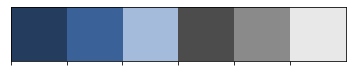

In [ ]:
flatui = ["#243c5d","#3b6298","#a4bbdb","#4c4c4c", "#8a8a8a", "#e8e8e8" ] #Membuat Color Palette
sns.set_palette(flatui)
sns.palplot(sns.color_palette())

## Mengubah parameter default matplotlib
Parameter default matplotlib dapat diubah dengan rcParams sebagai berikut

In [ ]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 12, 4
rcParams['lines.linewidth'] = 3
rcParams['xtick.labelsize'] = 'x-large'
rcParams['ytick.labelsize'] = 'x-large'

# Load and Describe Data

In [ ]:
df = pd.read_csv('Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


Dari Dataset di atas, terdapat 10.000 data/baris dan 13 kolom dimana datanya tidak ada yang null atau nan

## Pengelompokan Feature dari dataset

In [ ]:
cats = ['Gender','Geography']
nums = ['CreditScore','Age', 'Tenure','Balance', 'NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary']

## Distribusi data dari dataset

In [ ]:
df[nums].describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000


In [ ]:
df[cats].describe()

,Gender,Geography
count,10000,10000
unique,2,3
top,Male,France
freq,5457,5014


Dari dataset Cats di atas dapat kita lihat bahwa :
1. Feature Gender ada 2 unique dan dari yang paling banyak adalah Male dengan 5457 data
2. Feature Geography ada 3 unique dan dari yang paling banyak adalah France dengan 5014 data

## Check Sample data dari dataset

In [ ]:
df.sample(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
8346,8347,15793324,McKenzie,695,Spain,Male,32,9,0.00,3,0,1,38533.79,0
6722,6723,15750602,Clendinnen,662,France,Male,29,5,147092.65,1,1,0,10928.30,0
3942,3943,15786167,Andreyeva,649,Spain,Male,20,5,0.00,2,1,1,58309.54,0
5240,5241,15733842,Pirozzi,597,France,Female,24,1,103219.47,1,1,0,60420.07,0
9932,9933,15813451,Fleetwood-Smith,677,Spain,Male,18,8,134796.87,2,1,1,114858.90,0
5955,5956,15649024,Trujillo,748,France,Female,39,9,132865.56,1,1,1,59636.43,1
4767,4768,15688876,Wan,685,Spain,Male,39,9,0.00,2,1,1,18826.06,0
1876,1877,15664754,Steele,640,Germany,Male,39,9,131607.28,4,0,1,6981.43,1
910,911,15599660,Bennett,604,France,Male,36,6,116229.85,2,1,1,79633.38,0
5826,5827,15737961,Miller,509,Germany,Female,29,0,107712.57,2,1,1,92898.17,0


In [ ]:
# Check 5 data teratas
df.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
# Check 5 data terbawah
df.tail(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [ ]:
#Menambahkan Kolom baru untuk identifikasi tanda Baca "?" pada Feature Surname
df['Check_Surname'] = df['Surname'].apply(lambda x : True if '?' in x else False)
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Check_Surname
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,False
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,False
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,False
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,False
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,False


In [ ]:
#Filter Kolom Baru yang nilainya True
df_Filter=df[ df['Check_Surname'] == True ]
df_Filter.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Check_Surname
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0,True
329,330,15624528,L?,664,Germany,Male,26,7,116244.14,2,1,1,95145.14,0,True
437,438,15624623,Hs?,516,France,Male,35,10,104088.59,2,0,0,119666.00,0,True
941,942,15676521,Y?an,696,France,Female,31,8,0.00,2,0,0,191074.11,0,True
970,971,15805955,L?,638,France,Female,48,10,138333.03,1,1,1,47679.14,0,True


Pada Feature Surname ada 92 datanya terdapat tanda baca "?"

In [ ]:
#Replace Tanda Baca "?" pada Feature Surname
df['Surname'] = df['Surname'].str.replace('?','')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Check_Surname
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,False
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,False
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,False
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,False
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,False


In [ ]:
#Filer Check_Surname untuk mengetahui apakah tanda baca pada Feature Surname sudah ter replace
df[ df['Check_Surname'] == True ]
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Check_Surname
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,False
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,False
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,False
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,False
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,False


Dari hasil mengecek dataset diperoleh screening awal sebagai berikut :
- Jumlah baris 10000 baris
- Jumlah Kolom 14 kolom
- Kolom terdiri dari : RowNumber, CustomerId, Surname, CreditScore, Geography, Gender, Age, 	Tenure, Balance,	NumOfProducts,	HasCrCard,	IsActiveMember,	EstimatedSalary,	Exited
- Kolom yang menjadi target adalah kolom exited
- Tidak ada kolom yg null (akan dilakukan pengecekan)
- Pada Kolom Surname, ditemukan 92 data yang namanya terdapat tanda baca "?"

Proses cleansing yang akan dilakukan :
- Missing data
- Data duplikat
- Drop kolom
- Drop outliers (jika outliers dirasa terlalu jauh & mempengaruhi kinerja pemodelan)

## Duplicated Data

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.duplicated(subset=['CustomerId','Geography','Age']).sum()

0

Tidak ada duplicate data pada dataset dan Feature di atas

## Missing Data Value

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
 14  Check_Surname    10000 non-null  bool   
dtypes: bool(1), float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
df.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
Check_Surname      0
dtype: int64

Dari hasil pengecekan terlihat bahwa tidak ada data yang kosong atau missing. 

Sehingga tidak dilakukan proses drop atau imputasi row yang terdapat data yang kosong

Terdapat 4 type data pada dataset yaitu object,Integer, Float dan Bolean.

Jumlah data pada dataset tersebut adalah 10.000 data, dimana dari masing-masing Feature tidak ditemukan data yang hilang/null.

### Value Counting

In [ ]:
for col in df:
    print(f'''Value count kolom {col}:''')
    print(df[col].value_counts())
    print()

Value count kolom RowNumber:
2047    1
5424    1
1338    1
7481    1
5432    1
       ..
2716    1
8857    1
4759    1
6806    1
2049    1
Name: RowNumber, Length: 10000, dtype: int64

Value count kolom CustomerId:
15812607    1
15741078    1
15635776    1
15740223    1
15738174    1
           ..
15743714    1
15639265    1
15641312    1
15684319    1
15695872    1
Name: CustomerId, Length: 10000, dtype: int64

Value count kolom Surname:
Smith      32
Martin     29
Scott      29
Walker     28
Brown      26
           ..
Ardis       1
Bancks      1
Swain       1
Monnier     1
Molle       1
Name: Surname, Length: 2932, dtype: int64

Value count kolom CreditScore:
850    233
678     63
655     54
705     53
667     53
      ... 
419      1
417      1
373      1
365      1
401      1
Name: CreditScore, Length: 460, dtype: int64

Value count kolom Geography:
France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

Value count kolom Gender:
Male      5457
Female    454

### Drop Columns

In [ ]:
#Menghapus RowNumber dan Surname karena sudah terwakili oleh CustomerID
df = df.drop(columns=['RowNumber', 'Surname','Check_Surname'])
df.head()

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


Drop Faeture RowNumber dan Surname karena sudah terwakili oleh  feature CustomerId

Dari dataset terdapat kolom yang data nya tidak diperlukan untuk pemodelan. Sehingga kolom tersebut dapat didrop. Kolom yang tidak diperlukan adalah sebagai berikut : 
- RowNumber 
datanya hanya berisi urutan baris, tidak diperlukan karena sudah ada index
- Surname
- Check_Surname (kolom pengecekan tanda baca "?" data dari Surname)

## Outliers

### Seaborn

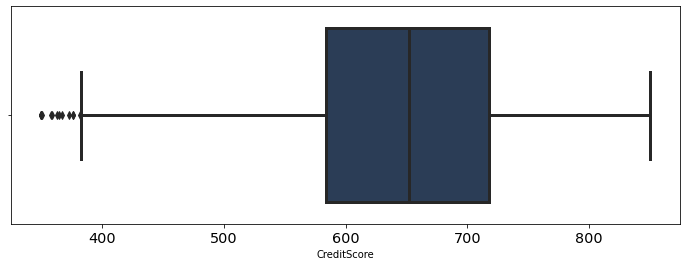

In [ ]:
sns.boxplot(x='CreditScore', data=df)

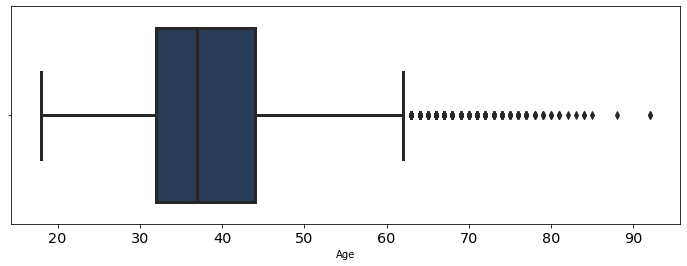

In [ ]:
sns.boxplot(x='Age', data=df)

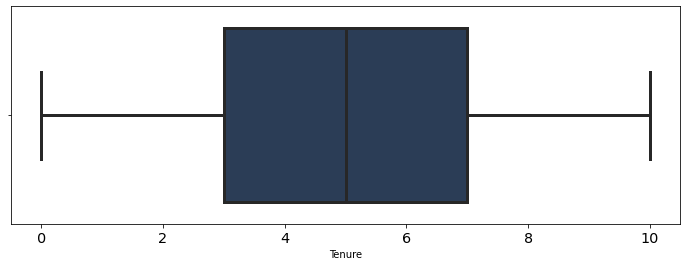

In [ ]:
sns.boxplot(x='Tenure', data=df)

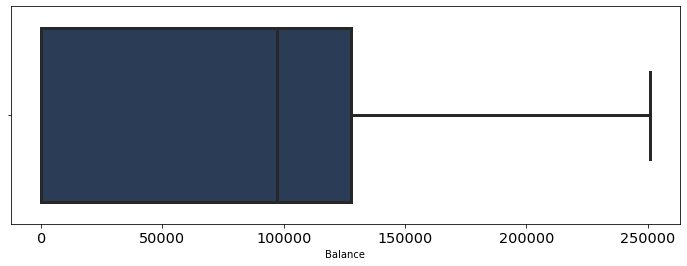

In [ ]:
sns.boxplot(x='Balance', data=df)

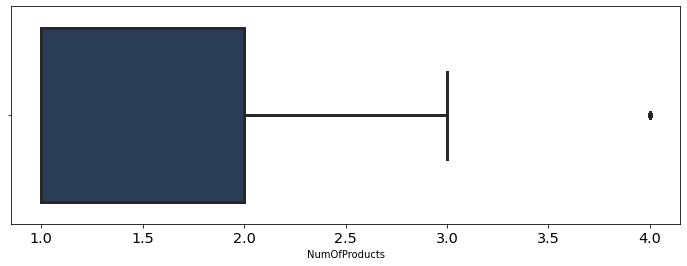

In [ ]:
sns.boxplot(x='NumOfProducts', data=df)

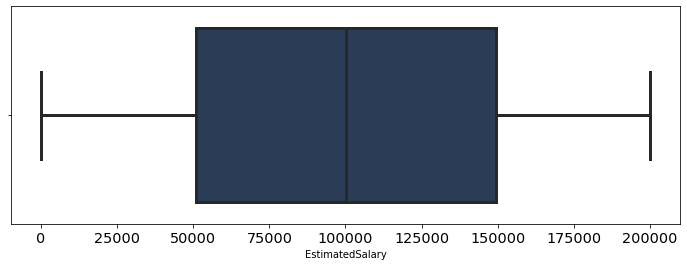

In [ ]:
sns.boxplot(x='EstimatedSalary', data=df)

### Matplotlib

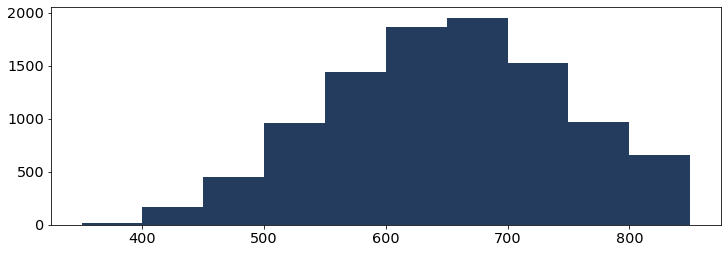

In [ ]:
plt.hist(x = 'CreditScore', data=df);

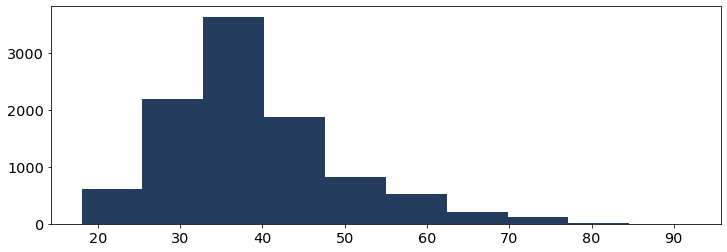

In [ ]:
plt.hist(x = 'Age', data=df);

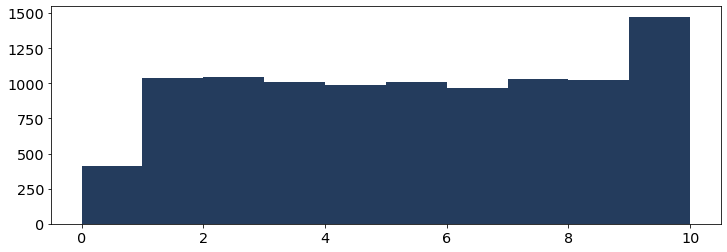

In [ ]:
plt.hist(x = 'Tenure', data=df);

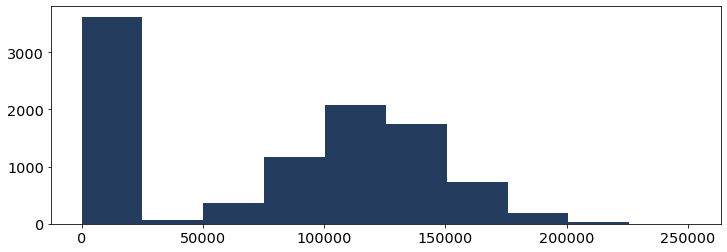

In [ ]:
plt.hist(x = 'Balance', data=df);

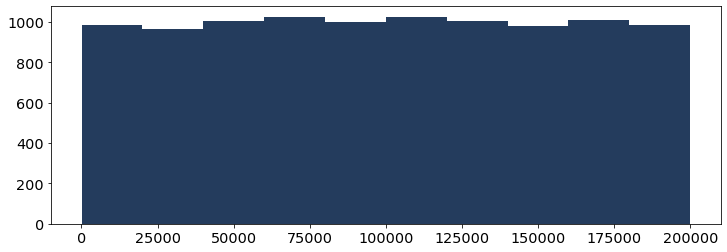

In [ ]:
plt.hist(x = 'EstimatedSalary', data=df);

Dari hasil visualisasi dengan boxplot dan histogram terdapat satu feature yang memiliki outliers, yaitu feature CreditScore.

Hasil diskusi Team bahwa feature Credit Score perlu di drop outliernya.

Kami menggunakan Z-Score untuk melakukan drop oulier nya.

- Dari hasil visualisasi dengan boxplot terdapat 1 kolom yang memiliki outliers, yaitu kolom Credit Scores

- Perlu dilakukan diskusi lebih lanjut, baris yang terdapat outliers tersebut perlu di drop atau tidak.

- Untuk drop digunakan filter dengan melihat nilai z-scores

### Menggunakan Z-score

In [ ]:
from scipy import stats

print(f'Jumlah baris sebelum memfilter outlier: {len(df)}')

filtered_entries = np.array([True] * len(df))
for col in ['CreditScore']:
    zscore = abs(stats.zscore(df[col]))
    filtered_entries = (zscore < 3) & filtered_entries
    
df = df[filtered_entries]

print(f'Jumlah baris setelah memfilter outlier: {len(df)}')

Jumlah baris sebelum memfilter outlier: 10000
Jumlah baris setelah memfilter outlier: 9992


#Customers Profile

Total Churn Not Churn

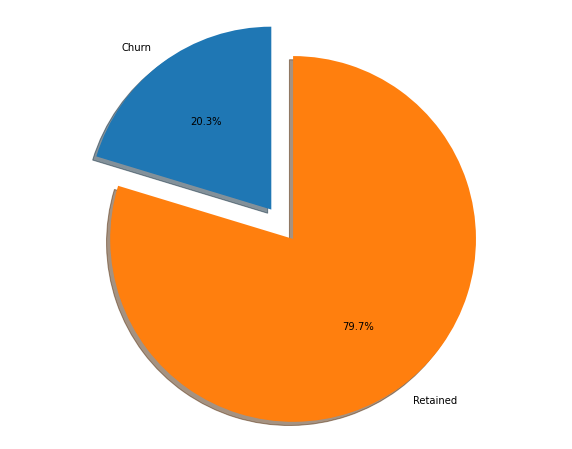

In [ ]:
#Data Visualisasi Pie-Chart Customer yang Churn di Bank Joga
labels = 'Churn', 'Retained'
sizes = [df.Exited[df['Exited']==1].count(), df.Exited[df['Exited']==0].count()]
explode = (0, 0.2)
fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.show()

Customers Gender

In [ ]:
df['Gender'].value_counts()

Male      5454
Female    4538
Name: Gender, dtype: int64

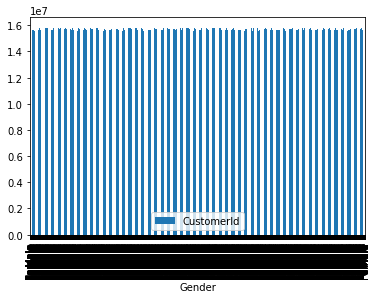

In [ ]:
df.plot(x='Gender', y='CustomerId', kind='bar');

Customers Geography

In [ ]:
df['Geography'].value_counts()

France     5010
Germany    2507
Spain      2475
Name: Geography, dtype: int64

The Number Of Product Customers

In [ ]:
df['NumOfProducts'].value_counts()

1    5078
2    4589
3     265
4      60
Name: NumOfProducts, dtype: int64

## Feature Engineering

---



In [ ]:
df.head()

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


Berdasarkan visualisasi sebelumnya features Balance memiliki 2 nilai maksimum, yang mengasumsikan terdapat 2 persebaran data. Maka perlu dilakukan analisa lanjutan untuk mengidentifikasi persebaran yang terbaik untuk digunakan. 

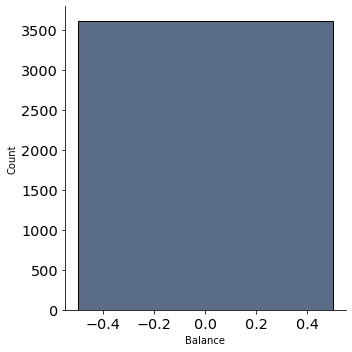

In [ ]:
balance_0 = df[df['Balance']==0]
sns.displot(data=balance_0,x='Balance')

Dari chart diatas dapat dilihat bahwa Balance nasabah yang O sebanyak 3.500 nasabah. Hal tersebut dapat menjadi indikasi dalam melakukan pemodelan peluang nasabah Churn 'Yes'.

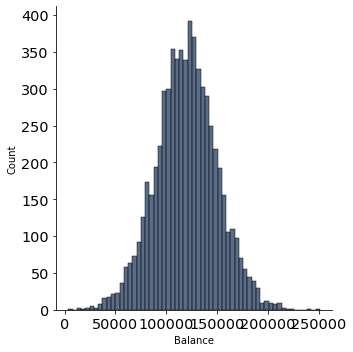

In [ ]:
balance_1 = df[df['Balance']!=0]
sns.displot(data=balance_1,x='Balance')

Dari histogram diatas dapat dilihat bahwa feature Balance memiliki 2 karakteristik. Dimana persebaran data=0 tidak memiliki variance/ terdistribusi pada satu nilai. sedangkan pada data>0 memiliki distribusi nilai yang normal. Walaupun demikian, feature dengan nilai=0 tidak layak untuk di drop karena jumlahnya yang besar (3615 data).

In [ ]:
#Melakukan One-Hot Encoding untuk Feature 'Geography', 'Gender' dan drop kolom Geograph dan Gender 
for i in cats:
    onehots = pd.get_dummies(df[i])
    df = df.join(onehots)

df=df.drop(columns=['Gender','Geography'])
df.sample(5)

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Female,Male,France,Germany,Spain
7194,15778290,799,70,8,70416.75,1,1,1,36483.52,0,0,1,1,0,0
2536,15752026,691,58,3,0.00,1,0,1,194930.30,1,0,1,1,0,0
3475,15770554,769,31,4,61297.05,2,1,1,7118.02,0,0,1,1,0,0
2794,15597930,646,52,8,59669.43,1,0,0,172495.81,1,0,1,1,0,0
7966,15750574,677,34,4,0.00,2,1,1,6175.53,0,1,0,0,0,1


One-Hot Encoding ini dilakukan untuk mengubah data ketegorial menjadi numerik binary dengan menjadikan setiap value feature menjadi unik. Hal ini berperan untuk perhitungan korelasi pada tahap selanjutnya. Sehingga kolom bertambah 5 yakni 3 dari feature Geography menjadi ‘Spain’, ‘Germany’ and ‘France’ dan Feature ‘Gender’ menjadi ‘Male’dan ‘Female’.

## Feature Selection

Text(0.5, 1.0, 'Correlation each Features')

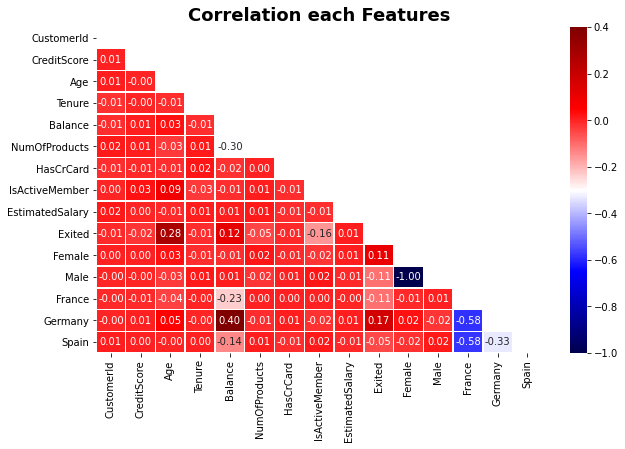

In [ ]:
#Correlation Comparation
plt.figure(figsize=(10, 6))

mask = np.triu(np.ones_like(df.corr(), dtype=bool))

sns.heatmap(df.corr(),annot=True,fmt='.2f',linewidths=0.5,linecolor='white',cmap='seismic',mask=mask)
plt.title('Correlation each Features',weight='bold',fontsize=18)

Berdasarkan chart HeatMap Correlation dari korelasi antar features, terlihat paling tinggi korelasi antara Feature:

1. Exited terhadap Age (0,28)
2. Exited terhadap Balance (0,12)
3. Exited terhadap IsActiveMember (-0,16)
4. Exited terhadap Germany (0,17)
5. Exited terhadap Female (0,11)


Terdapat informasi feature redundant pada :

1. Balance terhadap Germany
2. Balance terhadap NumOfProduct
3. Spain terhadap Germany dan France
4. Female terhadap Male

Identifikasi ini berdasarkan besarnya nilai korelasi bahkan melebihi korelasi terhadap terget sendiri.

Dari Informasi diatas, disimpulkan bahwa beberapa Feature yang harus dihapus ialah:

['CustomerId' , 'CreditScore' , 'Tenure' , 'NumOfProducts' , 'HasCrCard' , 'Balance', 'EstimateSalary' , 'Spain','France , 'Male']

## Distribusi Feature terhadap Varibel Target

In [ ]:
#Membuat keterangan dari feature IsActiveMember untuk visualisasi
def segment(x):
    if x['IsActiveMember'] == 0:
        segment = 'Non-Active'
    else:
        segment = 'Active'
    return segment

df['Ket_IsActiveMember'] = df.apply(lambda x: segment(x),axis =1)
df


,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Female,Male,France,Germany,Spain,Ket_IsActiveMember
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,0,1,0,0,Active
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,0,0,0,1,Active
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,0,1,0,0,Non-Active
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0,1,0,1,0,0,Non-Active
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,1,0,0,0,1,Active
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,France,Male,39,5,0.00,2,1,0,96270.64,0,0,1,1,0,0,Non-Active
9996,15569892,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,0,1,1,0,0,Active
9997,15584532,709,France,Female,36,7,0.00,1,0,1,42085.58,1,1,0,1,0,0,Active
9998,15682355,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,0,1,0,1,0,Non-Active


In [ ]:
#Membuat keterangan dari feature Exited untuk visualisasi
def segment(x):
    if x['Exited'] == 0:
        segment = 'Not Churn'
    else:
        segment = 'Churn'
    return segment

df['Ket_Churn'] = df.apply(lambda x: segment(x),axis =1)
df


,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Female,Male,France,Germany,Spain,Ket_IsActiveMember,Ket_Churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,0,1,0,0,Active,Churn
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,0,0,0,1,Active,Not Churn
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,0,1,0,0,Non-Active,Churn
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0,1,0,1,0,0,Non-Active,Not Churn
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,1,0,0,0,1,Active,Not Churn
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,France,Male,39,5,0.00,2,1,0,96270.64,0,0,1,1,0,0,Non-Active,Not Churn
9996,15569892,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,0,1,1,0,0,Active,Not Churn
9997,15584532,709,France,Female,36,7,0.00,1,0,1,42085.58,1,1,0,1,0,0,Active,Churn
9998,15682355,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,0,1,0,1,0,Non-Active,Churn


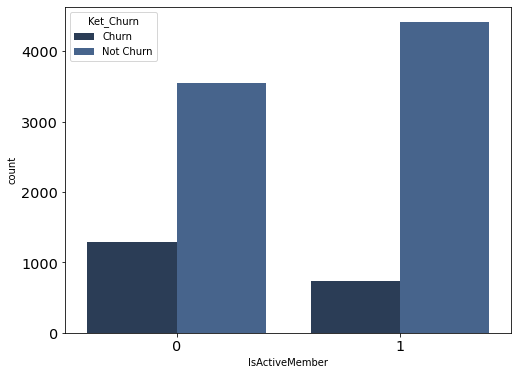

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(x='IsActiveMember', data=df, hue='Ket_Churn')

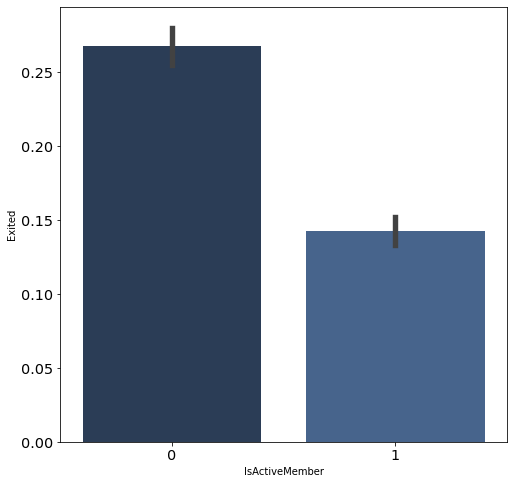

In [ ]:
#Distribusi IsActiveMember terhadap Exited
plt.figure(figsize=(8,8))
    
sns.barplot(x = 'IsActiveMember', y= 'Exited', data=df);

Dari distribusi data IsActiveMember terhadap Exited di atas, dapat kita lihat bahwa jumlah Nasabah yang IsActiveMember nilainya 0 ternyata churn Yes nya lebih tinggi dibandingkan dengan Nasabah yang IsActiveMember nilainya 1. Dari ratio terhadap churn yes Nasabah yang IsActiveMember nilainya 0 juga lebih tinggi dibanding dengan Nasabah yang IsActiveMember nilainya 1.


<Figure size 576x432 with 0 Axes>

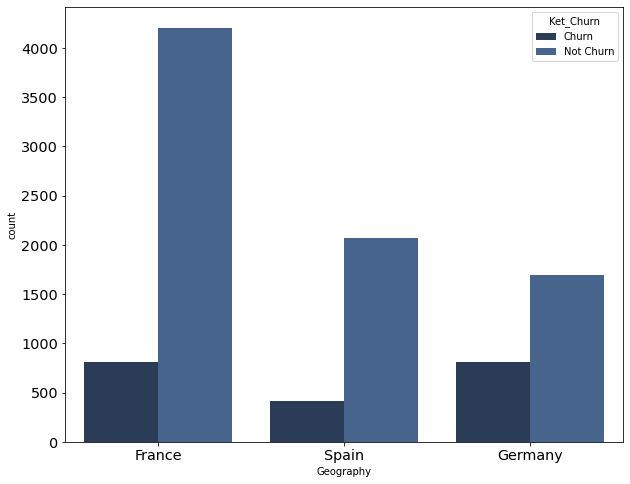

In [ ]:
plt.figure(figsize=(8,6))
sizes = [df.Exited[df['Geography']=='Germany'].count(), df.Exited[df['Geography']== 'Spain'].count(), df.Exited[df['Geography']== 'France'].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(10, 8))
sns.countplot(x='Geography', data=df, hue='Ket_Churn')

In [ ]:
df['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [ ]:
df2 = df.groupby(['Geography', 'Ket_Churn'])['CustomerId'].count().reset_index()
df2

,Geography,Ket_Churn,CustomerId
0,France,Churn,806
1,France,Not Churn,4204
2,Germany,Churn,812
3,Germany,Not Churn,1695
4,Spain,Churn,411
5,Spain,Not Churn,2064


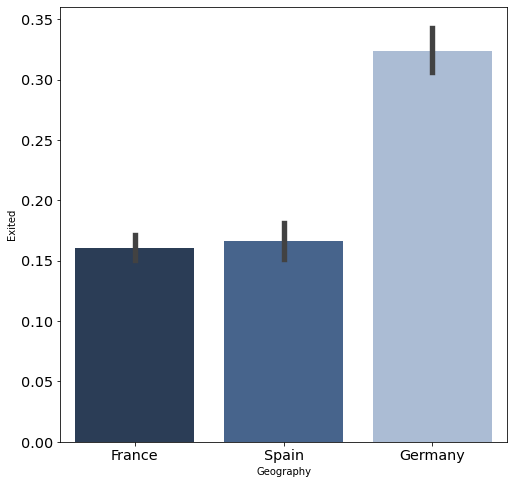

In [ ]:
plt.figure(figsize=(8,8))
sizes = [df.Exited[df['Geography']=='Germany'].count(), df.Exited[df['Geography']== 'Spain'].count(), df.Exited[df['Geography']== 'France'].count()]
sns.barplot(x = 'Geography', y= 'Exited', data=df);

Dari distribusi data Geography terhadap Exited di atas, dapat kita lihat bahwa jumlah Nasabah Germany churn Yes nya lebih tinggi dibandingkan dengan Nasabah France dan Spain. Dari ratio terhadap churn yes Nasabah Germany juga lebih tinggi dibanding dengan Nasabah France dan Spain.

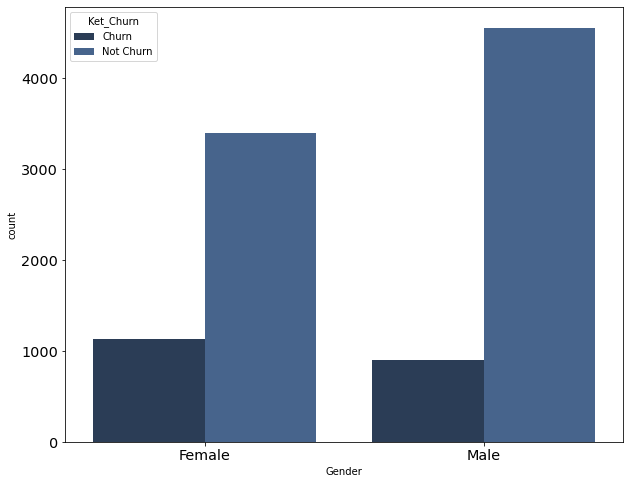

In [ ]:
plt.figure(figsize=(10,8))
sns.countplot(x='Gender', data=df, hue='Ket_Churn')

In [ ]:
df2 = df.groupby(['Gender', 'Ket_Churn'])['CustomerId'].count().reset_index()
df2

,Gender,Ket_Churn,CustomerId
0,Female,Churn,1134
1,Female,Not Churn,3404
2,Male,Churn,895
3,Male,Not Churn,4559


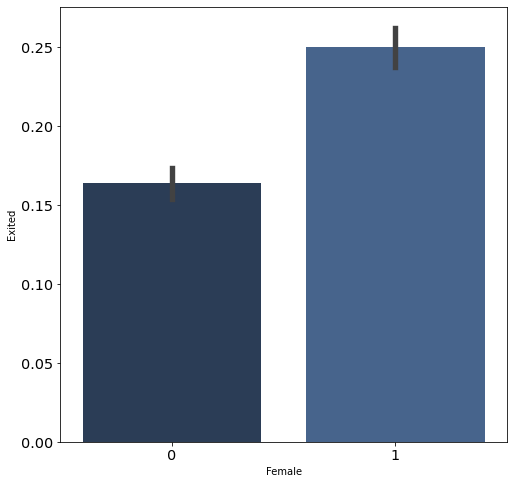

In [ ]:
 plt.figure(figsize=(8,8))
    
sns.barplot(x = 'Female', y= 'Exited', data=df);

Dari distribusi data Female terhadap Exited di atas, dapat kita lihat bahwa jumlah Nasabah dengan gender female churn Yes nya lebih tinggi dibandingkan dengan Nasabah yang gendernya Male. Dari ratio terhadap churn yes female juga lebih tinggi dibanding dengan Male



# **Univariate and Bivariate Analysis**

## Univariate Analysis
Setelah melakukan analisis sederhana tentang statistik deskriptif,pengecekan  pada satu-persatu kolom dengan *Univariate Analysis*, untuk melihat sebaran distribusi data 

### Box plots

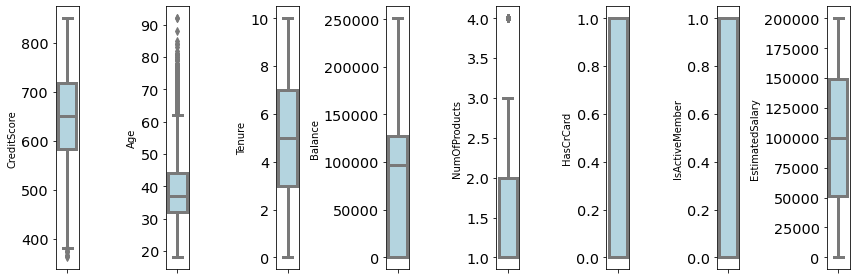

In [ ]:
for i in range(0, len(nums)):
  plt.subplot(1, len(nums), i+1)
  sns.boxplot(y=df[nums[i]], color='lightblue', orient='v')
  plt.tight_layout()

* Outlier terlihat utamanya pada kolom `Age`,dan `CreditScore`
* Dari boxplotnya terlihat mana distribusi yang terlihat adalah Age, `Balance`, `NumoffProduct`

### Distribusi plots

In [ ]:
df.fillna(0, inplace=True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

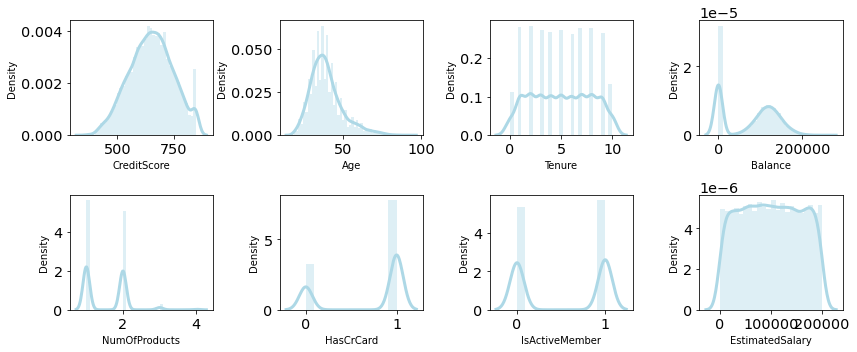

In [ ]:
plt.figure(figsize=(12, 5))
for i in range(0, len(nums)):
    plt.subplot(2, len(nums)/2, i+1)
    sns.distplot(df[nums[i]], color='lightblue')
    plt.tight_layout()

Dari distribution plot diatas, terdapat sebaran yang menarik dari fitur Balance yang memiliki 2 puncak. Sehingga kami mencoba mengklasifikasikan nasabah ke dalam 2 kategori, yaitu:
- Nasabah yang tidak memiliki Balance
- Nasabah yang memiliki Balance

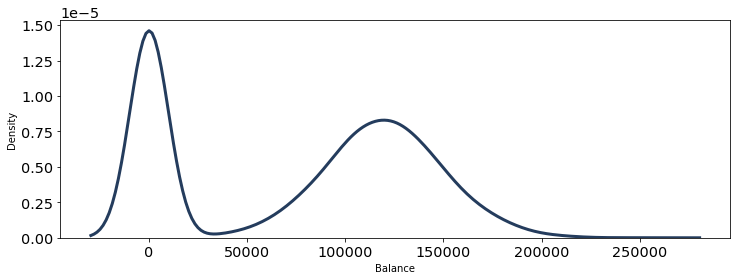

In [ ]:
sns.kdeplot(df['Balance'])

Di atas adalah detail sebaran data pada fitur Balance, kemudian kami klasfikasikan seperti berikut:

In [ ]:
balance_0 = df[df['Balance']==0]
balance_1 = df[df['Balance']!=0]

Nasabah yang tidak memiliki balance kami masukan ke dalam DataFrame balance_0 dan yang memiliki balance kami masukan ke dalam DataFrame balance_1. Setelah itu kami ingin melihat sebaran data, dan Churn Rate masing-masing kategori nasabah tersebut.

In [ ]:
Exit_0 = balance_0['Exited']
Exit_1 = balance_1['Exited']

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


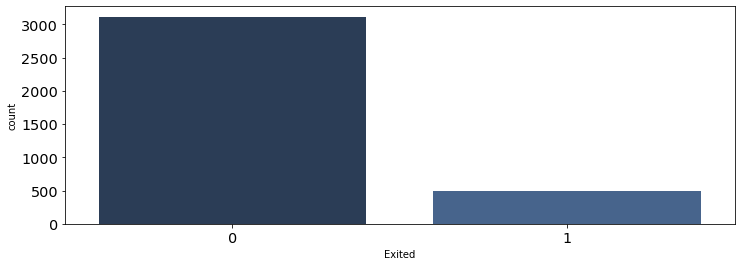

In [ ]:
sns.countplot(Exit_0)

In [ ]:
churn_rate_balance0 = balance_0[balance_0['Exited']==1].shape[0] *100 / df.shape[0]
print('Churn Rate nasabah yang tidak memiliki balance adalah ', churn_rate_balance0,'%')

Churn Rate nasabah yang tidak memiliki balance adalah  4.983987189751802 %


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


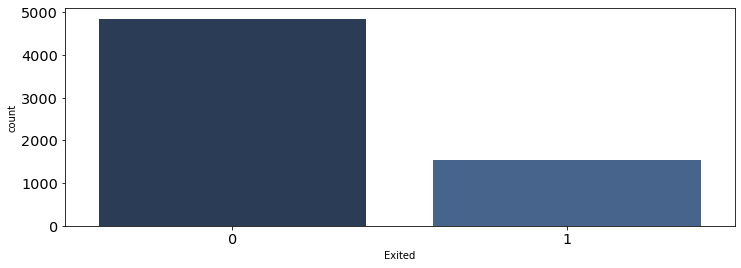

In [ ]:
sns.countplot(Exit_1)

In [ ]:
churn_rate_balance1 = balance_1[balance_1['Exited']==1].shape[0] *100 / df.shape[0]
print('Churn Rate nasabah yang memiliki balance adalah ', churn_rate_balance1,'%')

Churn Rate nasabah yang memiliki balance adalah  15.322257806244997 %


Secara umum jika melihat grafik batang, tidak terlihat perbedaan yang cukup jauh terkait kepemilikan balance di bank dengan peluang untuk Churn. Tetapi setelah menghitung nilai Churn, ternyata nasabah yang memiliki balance di Bank Joga memiliki ratio churn yang lebih tinggi (15.32%) dibanding nasabah yang tidak memiliki balance (4.98%).
<br><br> Setelah itu, kami ingin melihat bagaimana hubungan antara fitur dan target setelah diklasifikasikan ke 2 jenis nasabah ini.


### Violin plots

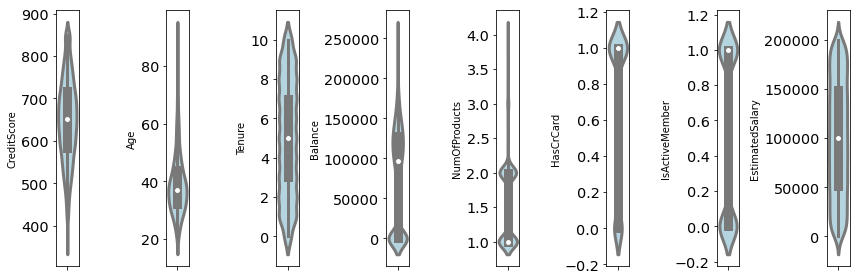

In [ ]:
for i in range(0, len(nums)):
    plt.subplot(1, len(nums), i+1)
    sns.violinplot(y=df[nums[i]], color='lightblue', orient='v')
    plt.tight_layout()

## Bivariate Analysis

### Correlation heatmap

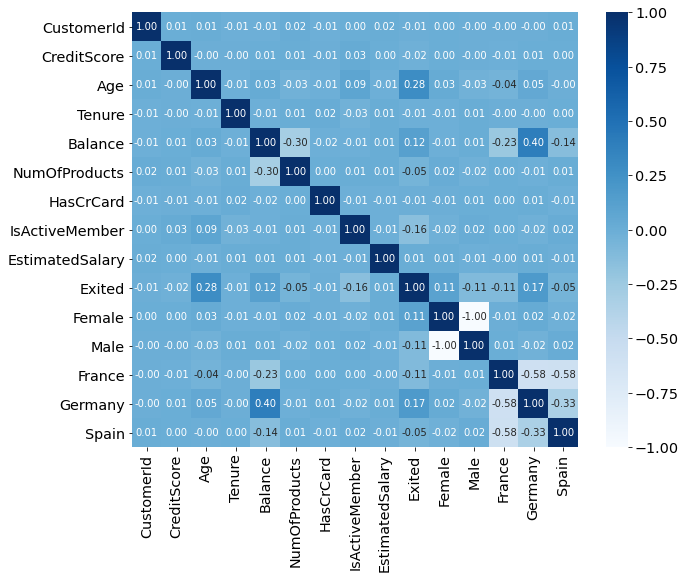

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), cmap='Blues', annot=True, fmt='.2f')

Terlihat disini yang memiliki korelasi cukup besar terhadap target adalah:
- Age
- Balance
- IsActiveMember
- Germany
- Female
<br><br> Berikutnya kami ingin melihat hubungan antara fitur dan target pada klasifikasi Nasabah yang memiliki Balance


### Comparison heatmap Correlation Based on Balance

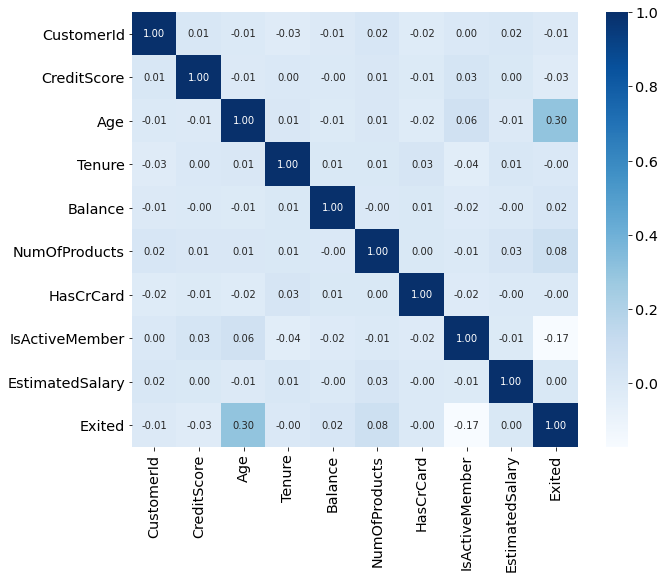

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(balance_1.corr(), cmap='Blues', annot=True, fmt='.2f')

Terlihat disini yang memiliki korelasi cukup besar terhadap target relatif sama dengan data awal, yaitu:
- Age
- IsActiveMember
<br><br> Berikutnya kami ingin melihat hubungan antara fitur dan target pada klasifikasi Nasabah yang tidak memiliki Balance

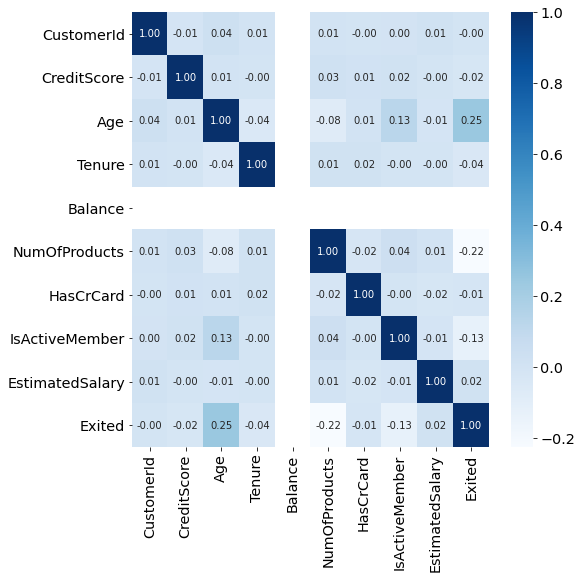

In [ ]:
plt.figure(figsize=(8, 8))
sns.heatmap(balance_0.corr(), cmap='Blues', annot=True, fmt='.2f')

Dari heatmap correlation untuk klasifikasi nasabah yang tidak memiliki balance, terjadi sesuatu yang **menarik**, dimana yang memiliki korelasi cukup besar terhadap target adalah:
- Age
- IsActiveMember
- **NumOfProducts**

<br>Dengan kata lain, khusus untuk nasabah yang tidak memiliki balance, NumOfProducts menjadi salah satu faktor penting nasabah yang berpeluang churn. Dimana semakin sedikit produk yang digunakan nasabah, maka peluang churn akan semakin besar.


### Pair plot

<Figure size 1080x1080 with 0 Axes>

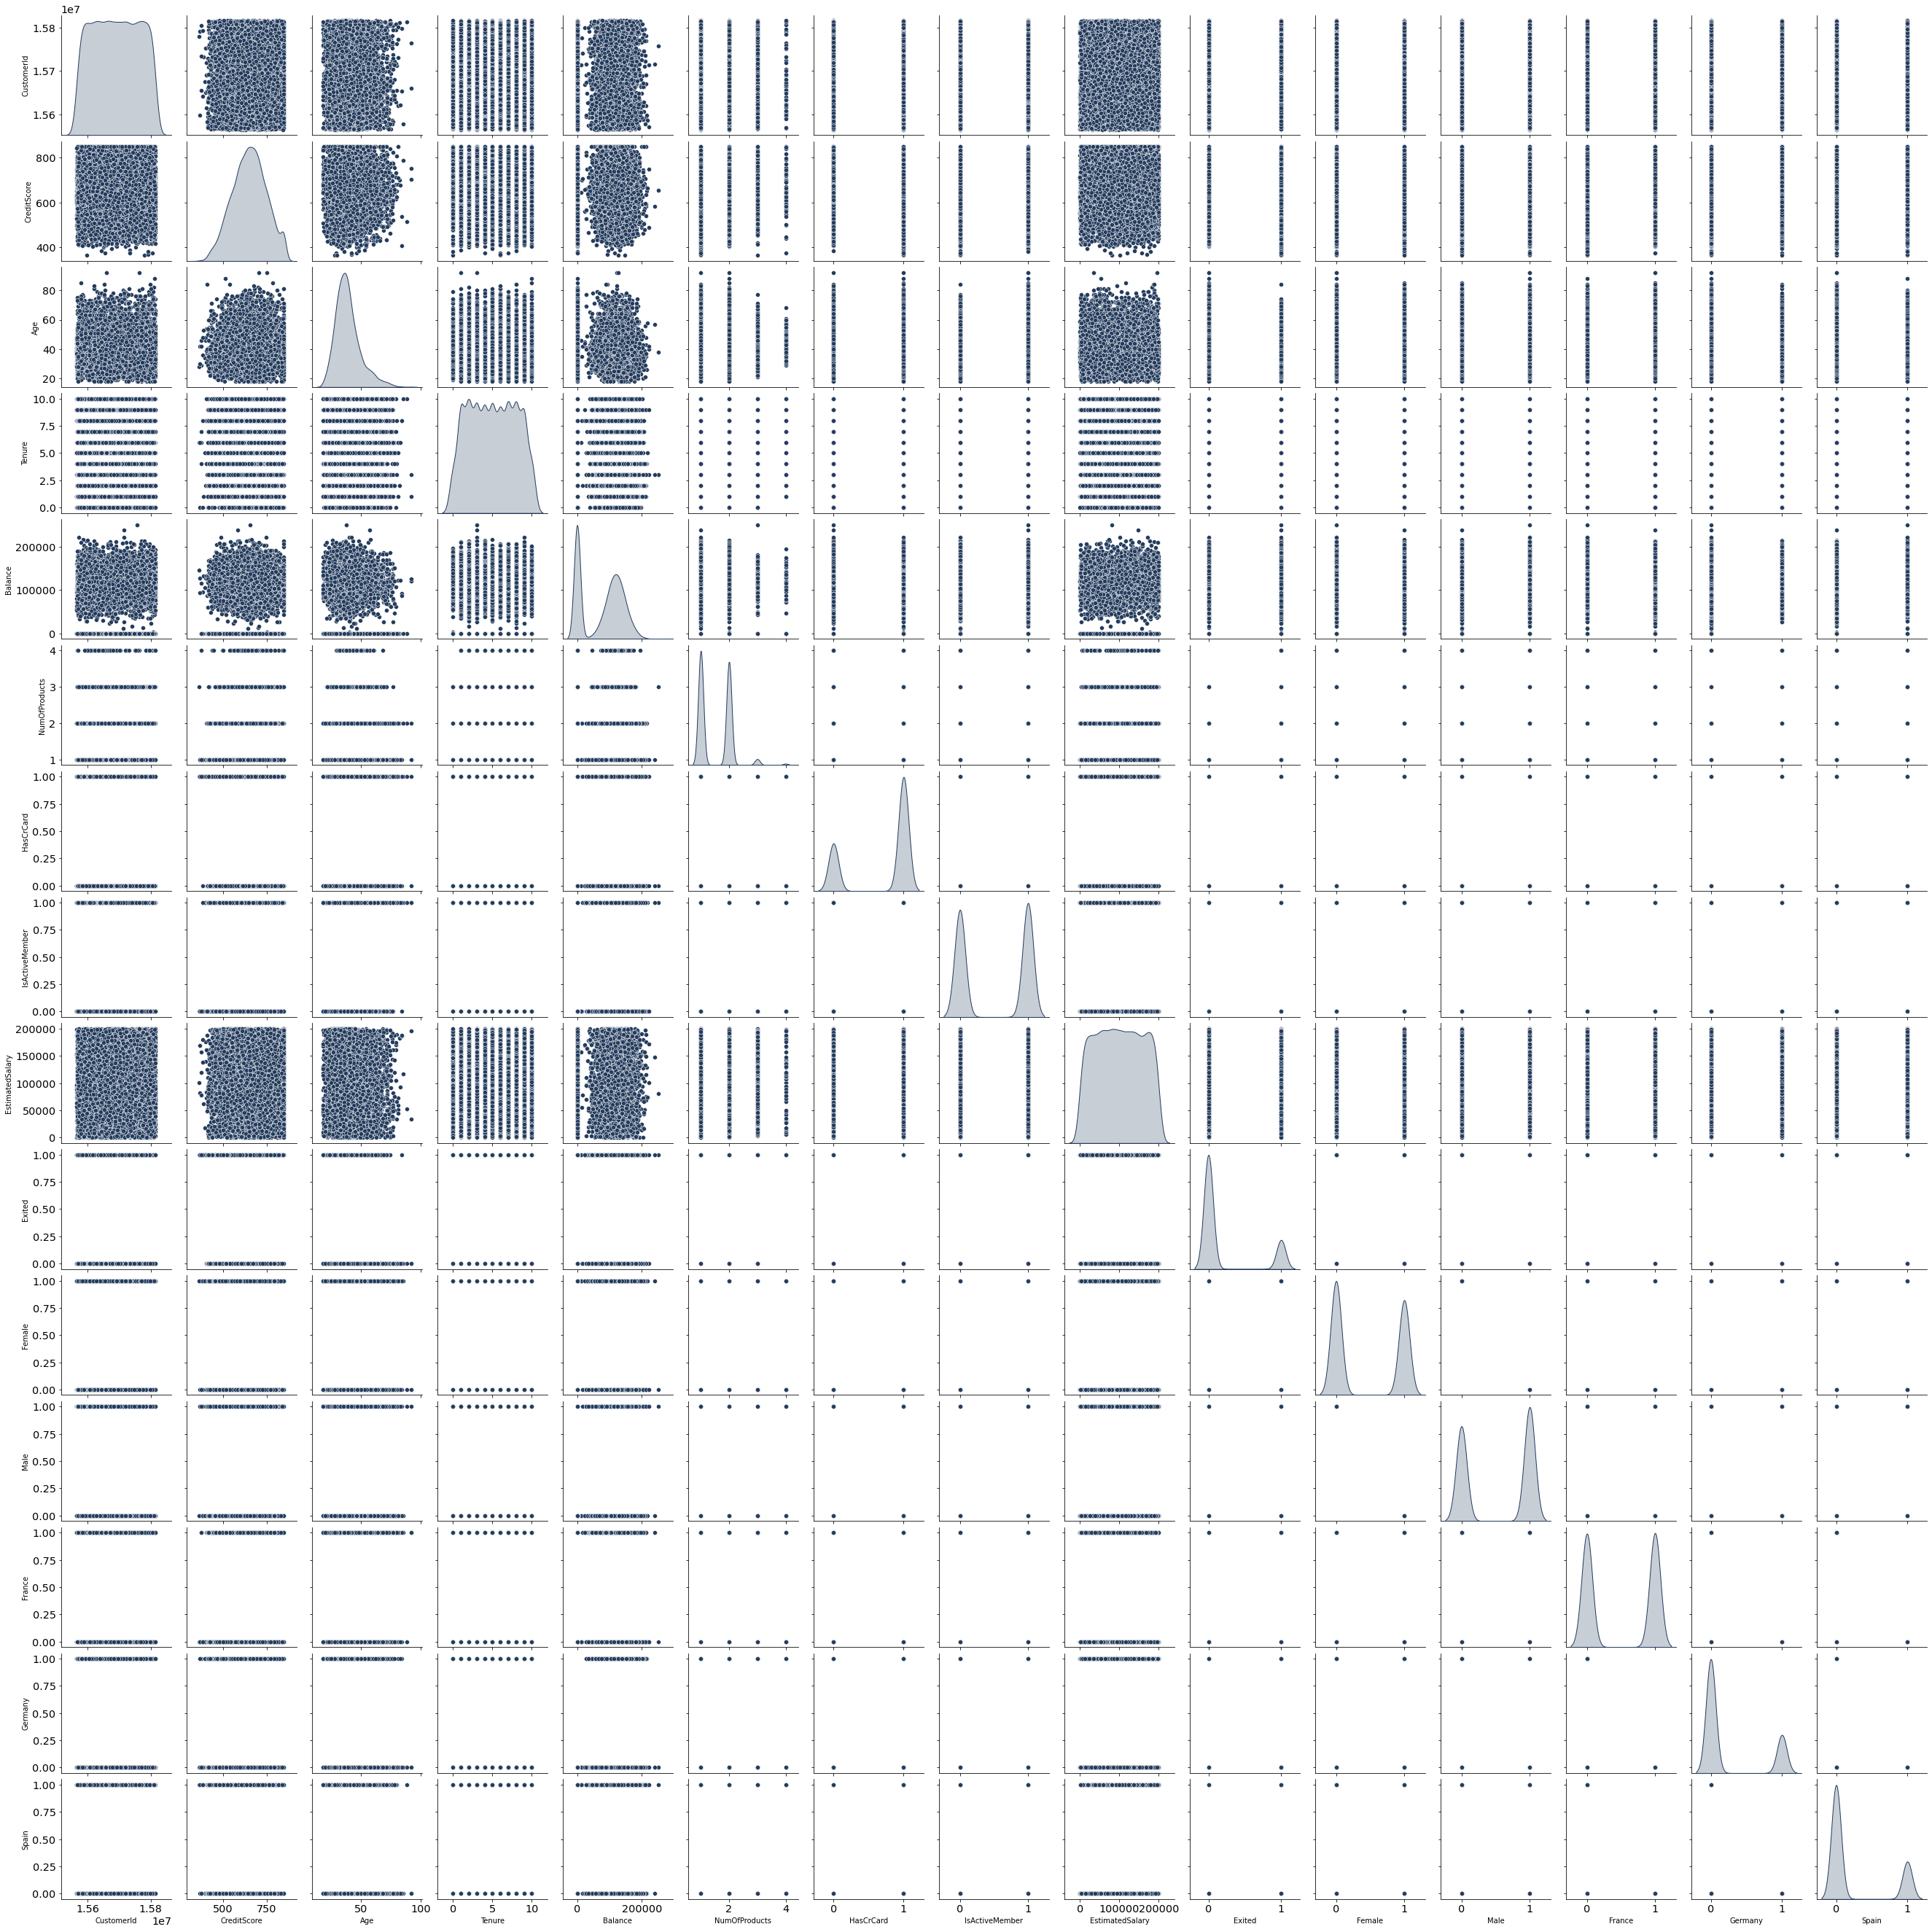

In [ ]:
plt.figure(figsize=(15, 15))
sns.pairplot(df, diag_kind='kde')

# **Feature Insight and Data Visualization**

#### Insight 1 (Balance Segmentation)
Mencari Insight dari Fitur `Balance` untuk membuat segmentasi Nasabah berdasarkan jumlah uang dalam rekening di Bank Joga. 

In [ ]:
df.head(10)

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Female,Male,France,Germany,Spain,Ket_IsActiveMember,Ket_Churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,0,1,0,0,Active,Churn
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,0,0,0,1,Active,Not Churn
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,0,1,0,0,Non-Active,Churn
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0,1,0,1,0,0,Non-Active,Not Churn
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,1,0,0,0,1,Active,Not Churn
5,15574012,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1,0,1,0,0,1,Non-Active,Churn
6,15592531,822,France,Male,50,7,0.00,2,1,1,10062.80,0,0,1,1,0,0,Active,Not Churn
7,15656148,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1,1,0,0,1,0,Non-Active,Churn
8,15792365,501,France,Male,44,4,142051.07,2,0,1,74940.50,0,0,1,1,0,0,Active,Not Churn
9,15592389,684,France,Male,27,2,134603.88,1,1,1,71725.73,0,0,1,1,0,0,Active,Not Churn


In [ ]:
#Membuat segmentasi `Balance` nasabah dan proporsi terhadap peluang Churn
df1 = df[['CustomerId','EstimatedSalary','Balance','Ket_Churn']]
df1.head()

,CustomerId,EstimatedSalary,Balance,Ket_Churn
0,15634602,101348.88,0.00,Churn
1,15647311,112542.58,83807.86,Not Churn
2,15619304,113931.57,159660.80,Churn
3,15701354,93826.63,0.00,Not Churn
4,15737888,79084.10,125510.82,Not Churn


In [ ]:
#Create Priority Customers berdasarkan Balance
df['Balance'].describe()

count      9992.000000
mean      76466.167618
std       62394.675730
min           0.000000
25%           0.000000
50%       97145.940000
75%      127638.027500
max      250898.090000
Name: Balance, dtype: float64

**Dari *percentile* di atas, dapat kita tentukan kategori customer kita berdasarkan kelompok *percentile* yang kita tentukan dari rata-rata `Balance`. Fitur tersebut menjadi bahan pertimbangan Bank Joga dalam menentukan segmentasi nasabah. Pada project kali ini, akan dibuat 4 kategori prioritas nasabah yaitu,**

1. Kelas *percentile* 0-25%  Balance `Bronze
2. Kelas *percentile* 25-50% Balance sebagai `Silver`
3. Kelas *percentile* 51-75% Balance sebagai `Gold`
4. Kelas *percentile* diatas 75% Balance sebagai `Platinum`

In [ ]:
#Membuat segmentasi nasabah berdasarkan Percentile `Balance` (Q1, Q2, Q3). 
def segment(x):
    if x['Balance'] == 0:
        segment = 'Bronze'
    elif x['Balance'] > 0 and x[ 'Balance'] <= 97198 :
        segment = 'Silver'
    elif x['Balance'] > 97198 and x['Balance'] <= 127644 :
        segment = 'Gold'
    else:
        segment = 'Platinum'
    return segment

df['SegmentCust'] = df.apply(lambda x: segment(x),axis =1)
df

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Female,Male,France,Germany,Spain,Ket_IsActiveMember,Ket_Churn,SegmentCust
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,0,1,0,0,Active,Churn,Bronze
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,0,0,0,1,Active,Not Churn,Silver
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,0,1,0,0,Non-Active,Churn,Platinum
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0,1,0,1,0,0,Non-Active,Not Churn,Bronze
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,1,0,0,0,1,Active,Not Churn,Gold
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,France,Male,39,5,0.00,2,1,0,96270.64,0,0,1,1,0,0,Non-Active,Not Churn,Bronze
9996,15569892,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,0,1,1,0,0,Active,Not Churn,Silver
9997,15584532,709,France,Female,36,7,0.00,1,0,1,42085.58,1,1,0,1,0,0,Active,Churn,Bronze
9998,15682355,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,0,1,0,1,0,Non-Active,Churn,Silver


In [ ]:
#Membuat segmentasi nasabah dengan target Exited
df2 = df.groupby(['SegmentCust', 'Ket_Churn'])['CustomerId'].count().reset_index()
df2

,SegmentCust,Ket_Churn,CustomerId
0,Bronze,Churn,498
1,Bronze,Not Churn,3117
2,Gold,Churn,655
3,Gold,Not Churn,1843
4,Platinum,Churn,588
5,Platinum,Not Churn,1908
6,Silver,Churn,288
7,Silver,Not Churn,1095


In [ ]:
#Menambahkan Kolom Total Customer
df2['TotalCust'] = [ 3617, 3617, 2500, 2500, 2500	, 2500, 1383, 1383]
df2

,SegmentCust,Ket_Churn,CustomerId,TotalCust
0,Bronze,Churn,498,3617
1,Bronze,Not Churn,3117,3617
2,Gold,Churn,655,2500
3,Gold,Not Churn,1843,2500
4,Platinum,Churn,588,2500
5,Platinum,Not Churn,1908,2500
6,Silver,Churn,288,1383
7,Silver,Not Churn,1095,1383


In [ ]:
#Membuat Churn Rate Nasabah per segmentasi 
df2['ChurnRate'] = (df2['CustomerId']/df2['TotalCust'])*100
df2

,SegmentCust,Ket_Churn,CustomerId,TotalCust,ChurnRate
0,Bronze,Churn,498,3617,13.768316
1,Bronze,Not Churn,3117,3617,86.176389
2,Gold,Churn,655,2500,26.200000
3,Gold,Not Churn,1843,2500,73.720000
4,Platinum,Churn,588,2500,23.520000
5,Platinum,Not Churn,1908,2500,76.320000
6,Silver,Churn,288,1383,20.824295
7,Silver,Not Churn,1095,1383,79.175705


Dari tabel Churn Rate segmentasi nasabah Bank Joga, dapat terlihat ChurnRate dari setiap segmentasi Nasabah. ChurnRate 'Yes' tertinggi ada di segmentasi **'Gold**' yakni 26,2% yakni nasabah yang memiliki Balance di Rentang Q2-Q3 dari total segmen nasabah sebesar 2.500 nasabah. Lalu diikuti dengan 'ChurnRate' Yes tinggi pada segmen **'Platinum'** dimana Balance diatas Q3 dengan Churn Yes sebesar 23,6% dari 2.500 segmen nasabah. Dari data ini, dapat terlihat bahwa nasabah yang berpeluang paling tinggi untuk Churn itu dari Segmentasi nasabah `Gold` dan `Platinum`.

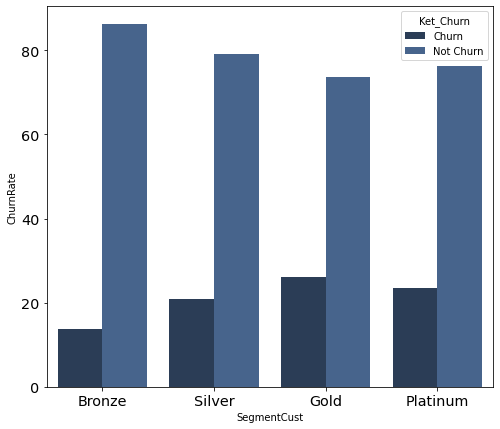

In [ ]:
#Visualisasi Segmentasi Nasabah berdasarkan Balance terhadap Peluang Churn 'ChurnRate'
plt.figure(figsize=(8,7))
sns.barplot(x='SegmentCust', y='ChurnRate', data=df2, 
            estimator=sum, hue='Ket_Churn', order=[ 'Bronze', 'Silver', 'Gold', 'Platinum'])

In [ ]:
df2 = df.groupby(['SegmentCust', 'Ket_Churn'])['CustomerId'].count().reset_index()
df2

,SegmentCust,Ket_Churn,CustomerId
0,Bronze,Churn,498
1,Bronze,Not Churn,3117
2,Gold,Churn,655
3,Gold,Not Churn,1843
4,Platinum,Churn,588
5,Platinum,Not Churn,1908
6,Silver,Churn,288
7,Silver,Not Churn,1095



#### Insight 2 (Proportion of EstimatedSalary and Balance)
Mencari Insight dari Fitur `EstimatedSalary` terhadap `Balance` untuk melihat berapa besar proporsi pendapatan nasabah yang dialokasikan di rekening bank.

In [ ]:
df.head()

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Female,Male,France,Germany,Spain,Ket_IsActiveMember,Ket_Churn,SegmentCust
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,0,1,0,0,Active,Churn,Bronze
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,0,0,0,1,Active,Not Churn,Silver
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,0,1,0,0,Non-Active,Churn,Platinum
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0,1,0,1,0,0,Non-Active,Not Churn,Bronze
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,1,0,0,0,1,Active,Not Churn,Gold


In [ ]:
#Mencari proporsi perbandingan dari Fitur Balance dan EstimatedSalary
df['WilltoSave'] = (df['Balance']/df['EstimatedSalary'])
df.head()

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Female,Male,France,Germany,Spain,Ket_IsActiveMember,Ket_Churn,SegmentCust,WilltoSave
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,0,1,0,0,Active,Churn,Bronze,0.000000
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,0,0,0,1,Active,Not Churn,Silver,0.744677
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,0,1,0,0,Non-Active,Churn,Platinum,1.401375
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0,1,0,1,0,0,Non-Active,Not Churn,Bronze,0.000000
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,1,0,0,0,1,Active,Not Churn,Gold,1.587055


In [ ]:
#Membuat segmentasi nasabah dengan target Exited
df1 = df.groupby(['SegmentCust', 'Ket_Churn'])['WilltoSave'].mean().reset_index()
df1

,SegmentCust,Ket_Churn,WilltoSave
0,Bronze,Churn,0.000000
1,Bronze,Not Churn,0.000000
2,Gold,Churn,23.956222
3,Gold,Not Churn,3.922679
4,Platinum,Churn,4.668923
5,Platinum,Not Churn,4.486670
6,Silver,Churn,2.118695
7,Silver,Not Churn,3.602697


Dari segmentasi diatas, telah dibuat kolom baru yakni `WilltoSave` yakni rasio perbandingan fitur `Balance`terhadap `EstimatedSalary`. Semakin tinggi rasio Willingness to Save maka semakin tinggi juga besaran `Balance` yang ada di Bank Joga terhadap `EstimatedSalary`. Dari data diatas, dapat terlihat segmen nasabah low_zero bernilai O karena uang dalam rekening tidak ada. Segmen nasabah yang paling tinggi dan sangat jaug perbedaan rasionya dari segmen lain  yakni segment "mid_high dan churn yes" yakni sebesar 23,88 rata-rata rasionya. Hal ini dapat mengindikasi bahwa terdapat nasabah dari segmen tersebut_high namun Estimated salarinya sangat rendah sehingga rasionya sangat tinggi. Hal lain diikuti oleh segment "high_prio" dimana rata-rata rasionya sebesar 4,4 dan 4,6. Hal ini menjadi relevan karena segmentasi nasabah high_prio ini memiliki jumlah Balance yang paling tinggi dibanding segmen nasabah lainnya. 

#### Insight 3 (Age Segmentation)
Pembagian peluang nasabah Churn berdasarkan segmentasi umur nasabah.

In [ ]:
#Melakukan Penambahan Feature Segment Age
def segment(x):
    if x['Age'] > 0  and x[ 'Age'] <= 24:
        segment = 'Gen Z'
    elif x['Age'] > 24  and x[ 'Age'] <= 40:
        segment = 'Millenials'
    elif x['Age'] > 40 and x['Age'] <= 56 :
        segment = 'Gen X'
    elif x['Age'] > 56 and x['Age'] <= 66 :
        segment = 'Boomers II'
    else:
        segment = 'Boomers I' # Age >66
    return segment

df['SegmentAge'] = df.apply(lambda x: segment(x),axis =1)

In [ ]:
df.head()

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Female,Male,France,Germany,Spain,Ket_IsActiveMember,Ket_Churn,SegmentCust,WilltoSave,SegmentAge
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,0,1,0,0,Active,Churn,Bronze,0.000000,Gen X
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,0,0,0,1,Active,Not Churn,Silver,0.744677,Gen X
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,0,1,0,0,Non-Active,Churn,Platinum,1.401375,Gen X
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0,1,0,1,0,0,Non-Active,Not Churn,Bronze,0.000000,Millenials
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,1,0,0,0,1,Active,Not Churn,Gold,1.587055,Gen X


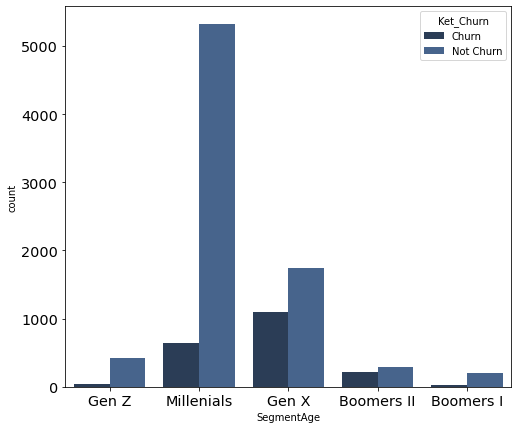

In [ ]:
plt.figure(figsize=(8,7))
sns.countplot(x='SegmentAge', data=df, hue='Ket_Churn', order=[ 'Gen Z', 'Millenials', 'Gen X', 'Boomers II', 'Boomers I'])

In [ ]:
#groupby customers by SegmentAge
df2 = df.groupby(['SegmentAge', 'Ket_Churn'])['CustomerId'].count().reset_index()
df2

,SegmentAge,Ket_Churn,CustomerId
0,Boomers I,Churn,28
1,Boomers I,Not Churn,201
2,Boomers II,Churn,214
3,Boomers II,Not Churn,285
4,Gen X,Churn,1103
5,Gen X,Not Churn,1744
6,Gen Z,Churn,40
7,Gen Z,Not Churn,417
8,Millenials,Churn,644
9,Millenials,Not Churn,5316


In [ ]:
#Customers Profile by Age Segmentation
df['SegmentAge'].value_counts()

Dari distribusi data Age terhadap Exited di atas, maka nasabah dapat diklasifikasikan menjadi 5 segmentasi dimana segment Gen Z (usia 41-56) jumlah Nasabah churn Yes nya paling tinggi yakni 1.038 nasabah. Namun secara ratio Segemnt, generasi Boomers II (usia 56-66) Churn 'Yes'nya lebih tinggi dibandingkan dengan SegemntAge lainnya.

#### Insight 4 (CreditScore Segmentation)
Pembagian peluang nasabah Churn berdasarkan CreditScore nasabah. dengan mengacu pada credit scores baseod on FICO's rating system.

In [ ]:
#Melakukan Penambahan Feature Segment CreditScore
def segment(x):
    if x['CreditScore'] >= 350 and x[ 'CreditScore'] <= 669:
        segment = 'Poor/Fair'
    elif x['CreditScore'] > 670  and x[ 'CreditScore'] <= 739:
        segment = 'Good'
    else:
        segment = 'Excellent' # 740 -850
    return segment

df['SegmentCreditScore'] = df.apply(lambda x: segment(x),axis =1)

In [ ]:
df.head()

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Female,Male,France,Germany,Spain,Ket_IsActiveMember,Ket_Churn,SegmentCust,WilltoSave,SegmentAge,SegmentCreditScore
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,0,1,0,0,Active,Churn,Bronze,0.000000,Gen X,Poor/Fair
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,0,0,0,1,Active,Not Churn,Silver,0.744677,Gen X,Poor/Fair
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,0,1,0,0,Non-Active,Churn,Platinum,1.401375,Gen X,Poor/Fair
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0,1,0,1,0,0,Non-Active,Not Churn,Bronze,0.000000,Millenials,Good
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,1,0,0,0,1,Active,Not Churn,Gold,1.587055,Gen X,Excellent


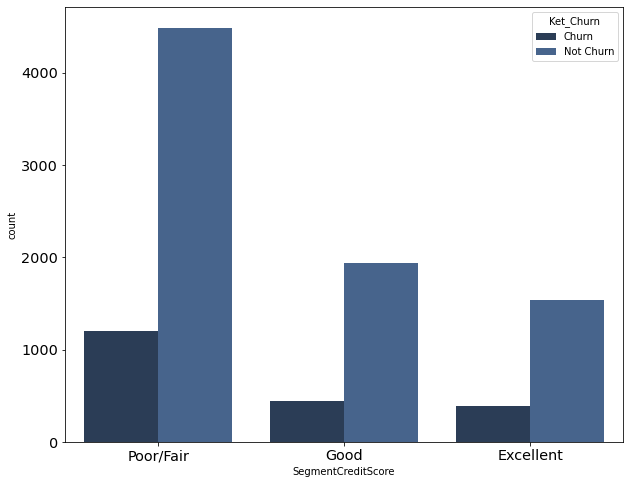

In [ ]:
#Data Visualisasi Segmentasi CreditScore terhadap Churn
plt.figure(figsize=(10,8))
sns.countplot(x='SegmentCreditScore', data=df, hue='Ket_Churn')

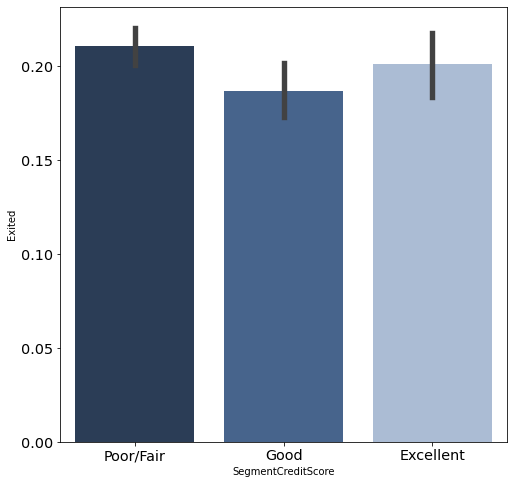

In [ ]:
#Membandingkan ChurnRate 'Yes' terhadap segmentasi umur nasabah
plt.figure(figsize=(8,8))
    
sns.barplot(x = 'SegmentCreditScore', y= 'Exited', data=df);

Dari distribusi data CreditScore terhadap Exited di atas, maka nasabah dapat diklasifikasikan menjadi 3 segmentasi yaitu Poor/Fair [350-669], "Good" [670-739], dan "Excellent [740-850] berdasarkan credit scores FICO's rating system. dimana churn rate terbesar terdapat pada segment Poor/Fair kemudian Good dan yang terkecil adalah Execellent.

#### Insight 5 (Tenure Segmentation)
Membuat segmentasi dari feature 'Tenure' menjadi 3 klasifikasi yakni:<br>
1. Low = under 1 year<br>
2. Short = 1 until 5 year<br>
3. Medium = 5 to 10 year<br>
Dikarenakan Tenure pada bank menjadi salah satu penentu dalam kontribusi keuntungan bank dari rentang waktu kredit nasabah yang memberikan profit pada Bank. Semakin lama tenure bank maka semakin banyak keuntungan didapatkan Bank.

In [ ]:
#Membuat segmentasi nasabah berdasarkan Tenure 
def segment(x):
    if x['Tenure'] == 0:
        segment = 'low_term'
    elif x['Tenure'] > 0 and x[ 'Tenure'] <= 5 :
        segment = 'short_term'
    elif x['Tenure'] > 5 and x['Tenure'] <= 10 :
        segment = 'medium_term'
    return segment

df['Tenure_Term'] = df.apply(lambda x: segment(x),axis =1)
df.head()

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Female,Male,France,Germany,Spain,Ket_IsActiveMember,Ket_Churn,SegmentCust,WilltoSave,SegmentAge,SegmentCreditScore,Tenure_Term
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,0,1,0,0,Active,Churn,Bronze,0.000000,Gen X,Poor/Fair,short_term
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,0,0,0,1,Active,Not Churn,Silver,0.744677,Gen X,Poor/Fair,short_term
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,0,1,0,0,Non-Active,Churn,Platinum,1.401375,Gen X,Poor/Fair,medium_term
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0,1,0,1,0,0,Non-Active,Not Churn,Bronze,0.000000,Millenials,Good,short_term
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,1,0,0,0,1,Active,Not Churn,Gold,1.587055,Gen X,Excellent,short_term


In [ ]:
#groupby customer by Tenurer
df2 = df.groupby(['Tenure_Term', 'Ket_Churn'])['CustomerId'].count().reset_index()
df2

,Tenure_Term,Ket_Churn,CustomerId
0,low_term,Churn,93
1,low_term,Not Churn,318
2,medium_term,Churn,881
3,medium_term,Not Churn,3610
4,short_term,Churn,1055
5,short_term,Not Churn,4035


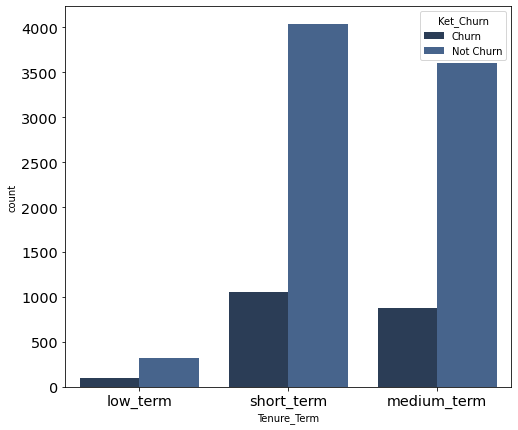

In [ ]:
#Data Visualisasi Tenure Term terhadap Potensi Churn
plt.figure(figsize=(8,7))
sns.countplot(x='Tenure_Term', data=df, hue='Ket_Churn', order=[ 'low_term', 'short_term', 'medium_term'])

In [ ]:
#Customers Profile by Tenure
df['Tenure_Term'].value_counts()

Keterangan:<br>
Dari chart tersebut dapat terlihat bahwa nasabah yang paling banyak Churn ialah nasabah yang memiliki tenure jangka pendek yakni dari 1 tahun sampai 5 tahun yakni sebanyak 1.058 nasabah.

#### Insight 6 (Geography and Gender Correlation)
Menambahkan Feature baru dari penggabungan dua feature untuk melihat apakah berpengaruh terhadap churn rate

In [ ]:
#Menambahkan feature baru 
df['Geo_Gender']= df['Geography'].str.cat(df['Gender'],sep='-')
df['Gender_IsActiveMember']= df['Gender'].str.cat(df['IsActiveMember'].astype('str'),sep='-')
df['CreditScore_Age']= df['SegmentCreditScore'].str.cat(df['SegmentAge'].astype('str'),sep='-')
df['SegmentCust_NumOfProducts']= df['SegmentCust'].str.cat(df['NumOfProducts'].astype('str'),sep='-')

df.head()

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Female,Male,France,Germany,Spain,Ket_IsActiveMember,Ket_Churn,SegmentCust,WilltoSave,SegmentAge,SegmentCreditScore,Tenure_Term,Geo_Gender,Gender_IsActiveMember,CreditScore_Age,SegmentCust_NumOfProducts
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,0,1,0,0,Active,Churn,Bronze,0.000000,Gen X,Poor/Fair,short_term,France-Female,Female-1,Poor/Fair-Gen X,Bronze-1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,0,0,0,1,Active,Not Churn,Silver,0.744677,Gen X,Poor/Fair,short_term,Spain-Female,Female-1,Poor/Fair-Gen X,Silver-1
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,0,1,0,0,Non-Active,Churn,Platinum,1.401375,Gen X,Poor/Fair,medium_term,France-Female,Female-0,Poor/Fair-Gen X,Platinum-3
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0,1,0,1,0,0,Non-Active,Not Churn,Bronze,0.000000,Millenials,Good,short_term,France-Female,Female-0,Good-Millenials,Bronze-2
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,1,0,0,0,1,Active,Not Churn,Gold,1.587055,Gen X,Excellent,short_term,Spain-Female,Female-1,Excellent-Gen X,Gold-1


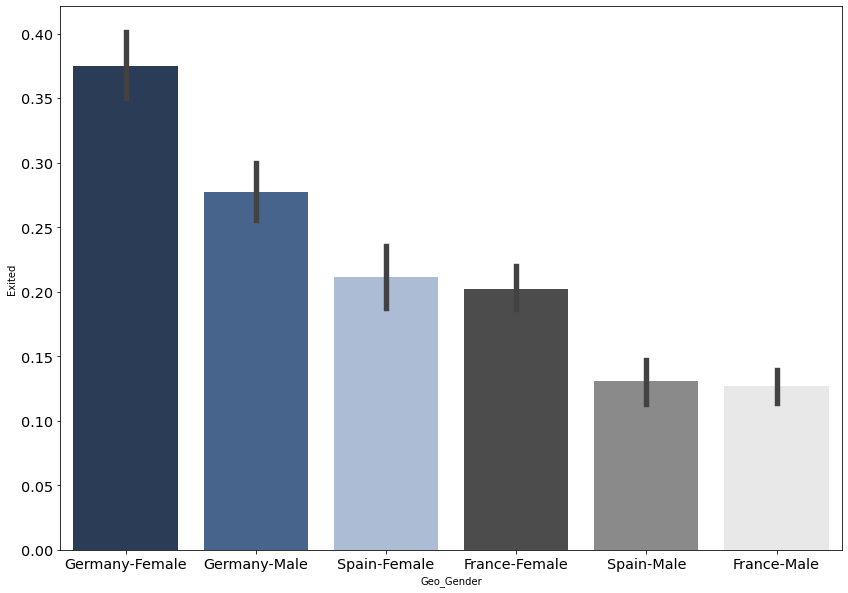

In [ ]:
plt.figure(figsize=(14,10))
sns.barplot(x = 'Geo_Gender', y= 'Exited', data=df,order =['Germany-Female','Germany-Male','Spain-Female','France-Female','Spain-Male','France-Male']);

In [ ]:
#groupby customer by Tenurer
df2 = df.groupby(['Geo_Gender', 'Ket_Churn'])['CustomerId'].count().reset_index()
df2

,Geo_Gender,Ket_Churn,CustomerId
0,France-Female,Churn,457
1,France-Female,Not Churn,1801
2,France-Male,Churn,349
3,France-Male,Not Churn,2403
4,Germany-Female,Churn,447
5,Germany-Female,Not Churn,745
6,Germany-Male,Churn,365
7,Germany-Male,Not Churn,950
8,Spain-Female,Churn,230
9,Spain-Female,Not Churn,858


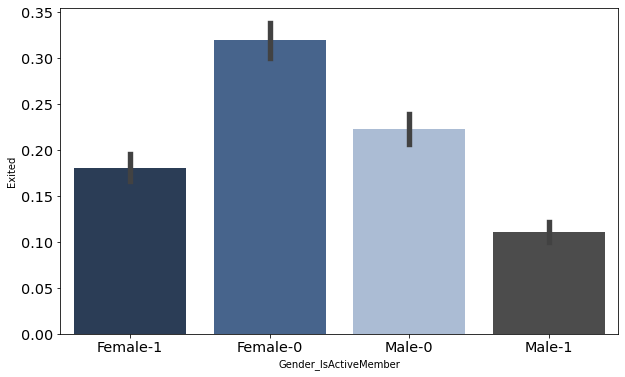

In [ ]:
plt.figure(figsize=(10,6))
    
sns.barplot(x = 'Gender_IsActiveMember', y= 'Exited', data=df);

In [ ]:
df2 = df.groupby(['Gender_IsActiveMember', 'Ket_Churn'])['CustomerId'].count().reset_index()
df2

,Gender_IsActiveMember,Ket_Churn,CustomerId
0,Female-0,Churn,721
1,Female-0,Not Churn,1534
2,Female-1,Churn,413
3,Female-1,Not Churn,1870
4,Male-0,Churn,576
5,Male-0,Not Churn,2013
6,Male-1,Churn,319
7,Male-1,Not Churn,2546


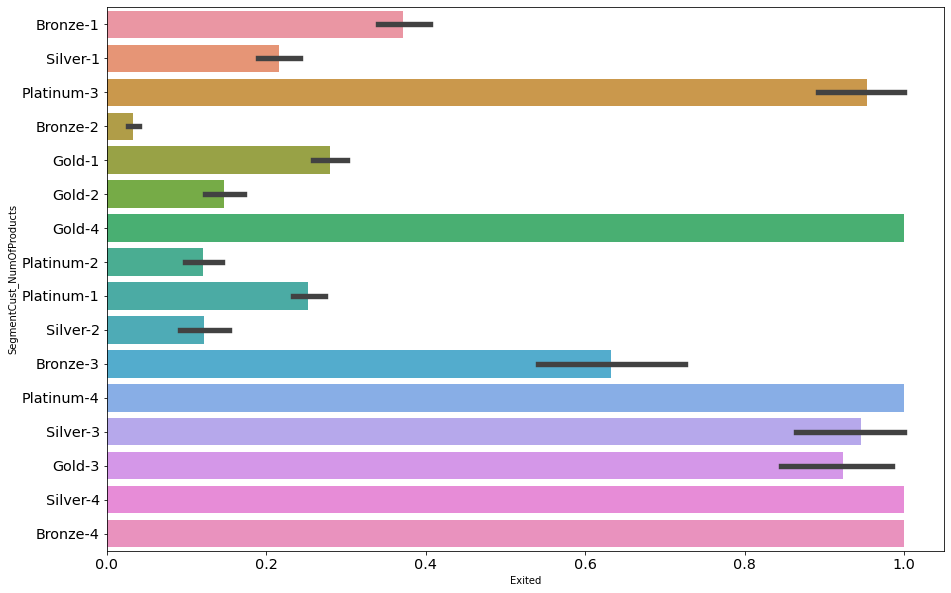

In [ ]:
plt.figure(figsize=(15,10))
    
sns.barplot(x = 'Exited', y= 'SegmentCust_NumOfProducts', data=df);


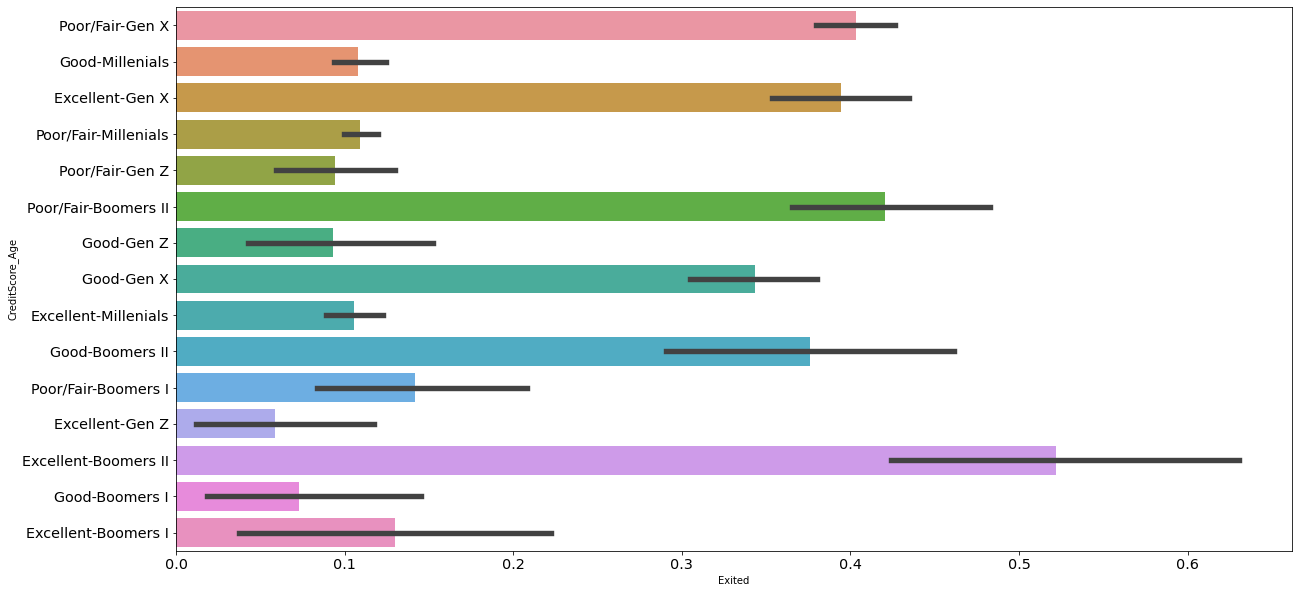

In [ ]:
plt.figure(figsize=(20,10))
    
sns.barplot(y = 'CreditScore_Age', x= 'Exited', data=df);

#### Insight 7 (NumOfProducts Correlation)
 Feature NumOfProducts untuk melihat apakah berpengaruh terhadap churn rate

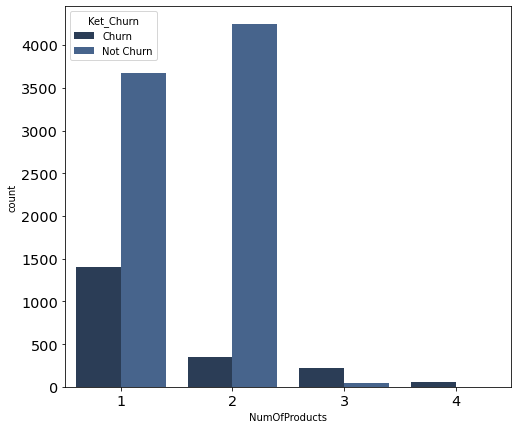

In [ ]:
#Data Visualisasi NumOfProducts Term terhadap Potensi Churn
plt.figure(figsize=(8,7))
sns.countplot(x='NumOfProducts', data=df, hue='Ket_Churn')

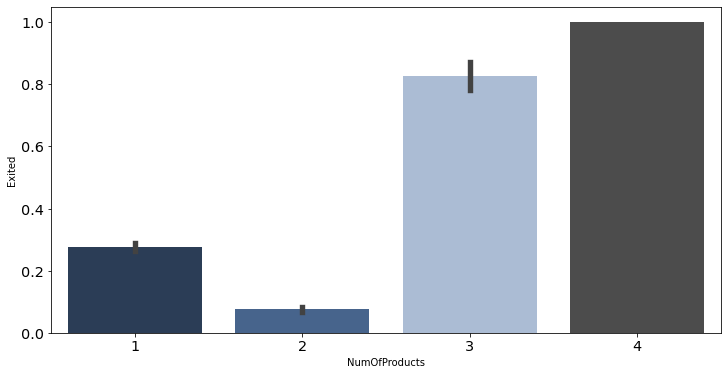

In [ ]:
plt.figure(figsize=(12,6))
    
sns.barplot(x = 'NumOfProducts', y= 'Exited', data=df);

In [ ]:
#groupby customer by NumOfProducts
df2 = df.groupby(['NumOfProducts', 'Ket_Churn'])['CustomerId'].count().reset_index()
df2

,NumOfProducts,Ket_Churn,CustomerId
0,1,Churn,1403
1,1,Not Churn,3675
2,2,Churn,347
3,2,Not Churn,4242
4,3,Churn,219
5,3,Not Churn,46
6,4,Churn,60


Dari distribusi data NumOfProducts terhadap Churn, maka nasabah dengan product 1 , jumlah nasabah yang churn lebih tinggi dibandingkan dengan jumalh product lainnya. Namun secara ratio, jumlah product 3 dan 4 churn nya lebih tinggi dibandingkan dengan yang lain

In [ ]:
##Menghapus RowNumber dan Surname karena sudah terwakili oleh CustomerID
#df = df.drop(columns=['SegmentAge'])
#df.head()

## Normalization/Standardization

In [ ]:
df.describe()


,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Female,Male,France,Germany,Spain,WilltoSave
count,9992.000000,9.992000e+03,9992.000000,9992.000000,9992.000000,9992.000000,9992.000000,9992.000000,9992.000000,9992.000000,9992.000000,9992.000000,9992.000000,9992.000000,9992.000000,9992.000000,9992.000000
mean,5000.858086,1.569093e+07,650.767614,38.913231,5.013611,76466.167618,1.530324,0.705464,0.515212,100051.675896,0.203062,0.454163,0.545837,0.501401,0.250901,0.247698,3.881290
std,2886.330379,7.194442e+04,96.322544,10.485596,2.891494,62394.675730,0.581537,0.455857,0.499794,57512.753593,0.402299,0.497919,0.497919,0.500023,0.433553,0.431697,108.380586
min,1.000000,1.556570e+07,363.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2503.750000,1.562850e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.000000,0.000000,50957.302500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5001.500000,1.569074e+07,652.000000,37.000000,5.000000,97145.940000,1.000000,1.000000,1.000000,100134.325000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.746862
75%,7499.250000,1.575322e+07,718.000000,44.000000,7.000000,127638.027500,2.000000,1.000000,1.000000,149382.097500,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.515279
max,10000.000000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10614.655440


In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler


In [ ]:
# features = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Male',
#        'France', 'Germany', 'Spain']

features = ['Age','Balance','IsActiveMember','Female','Germany','NumOfProducts']

for var in features:
  df[var]= (df[var]+1).apply(np.log)

from sklearn.preprocessing import MinMaxScaler, StandardScaler
for var in features:
  df[var]= MinMaxScaler().fit_transform(df[var].values.reshape(len(df), 1))

In [ ]:
df.describe()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Female,Male,France,Germany,Spain
count,9.992000e+03,9992.000000,9992.000000,9992.000000,9992.000000,9992.000000,9992.000000,9992.000000,9992.000000,9992.000000,9992.000000,9992.000000,9992.000000,9992.000000,9992.000000
mean,1.569093e+07,650.767614,0.447093,5.013611,0.598433,0.229296,0.705464,0.515212,100051.675896,0.203062,0.453857,0.545837,0.501401,0.250977,0.247698
std,7.194442e+04,96.322544,0.158429,2.891494,0.450955,0.241952,0.455857,0.499794,57512.753593,0.402299,0.497803,0.497919,0.500023,0.433594,0.431697
min,1.556570e+07,363.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.580000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.562850e+07,584.000000,0.347615,3.000000,0.000000,0.000000,0.000000,0.000000,50957.302500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.569074e+07,652.000000,0.436447,5.000000,0.923684,0.000000,1.000000,1.000000,100134.325000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
75%,1.575322e+07,718.000000,0.542907,7.000000,0.945640,0.442507,1.000000,1.000000,149382.097500,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,1.581569e+07,850.000000,1.000000,10.000000,1.000000,1.000000,1.000000,1.000000,199992.480000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#Imbalance Class Handling

In [ ]:
  df['Exited'].value_counts()

0    7963
1    2029
Name: Exited, dtype: int64

In [ ]:
X =df[['Age','Balance','IsActiveMember','Female','Germany','NumOfProducts']]
y = df['Exited'].values
print(X.shape)
print(y.shape)

(9992, 6)
(9992,)


In [ ]:
#Splitting the data into Train and Test
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
X_train.shape

(7993, 6)

In [ ]:
X_test.shape

(1999, 6)

In [ ]:
from imblearn import under_sampling, over_sampling

X_train, y_train = over_sampling.SMOTE().fit_resample(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
print(X_train.shape, y_train.shape)

(12720, 6) (12720,)


In [ ]:
print(pd.Series(y_test).value_counts())

0    1603
1     396
dtype: int64


In [ ]:
X_test=np.array(X_test)

# Model and Evaluation

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc

def eval_classification(model, pred, xtrain, ytrain, xtest, ytest):
    print("Accuracy (Test Set): %.2f" % accuracy_score(ytest, pred))
    print("Precision (Test Set): %.2f" % precision_score(ytest, pred))
    print("Recall (Test Set): %.2f" % recall_score(ytest, pred))
    print("F1-Score (Test Set): %.2f" % f1_score(ytest, pred))
    
    fpr, tpr, thresholds = roc_curve(ytest, pred, pos_label=1) # pos_label: label yang kita anggap positive
    print("AUC: %.2f" % auc(fpr, tpr))

def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index=X.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()

    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('feature importance score')

def show_best_hyperparameter(model, hyperparameters):
    for key, value in hyperparameters.items() :
        print('Best '+key+':', model.get_params()[key])

# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
logres = LogisticRegression(random_state=42)
logres.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

**Modelling & Evaluation**

In [ ]:
y_pred = logres.predict(X_test)
eval_classification(logres, y_pred, X_train, y_train, X_test, y_test)

Accuracy (Test Set): 0.71
Precision (Test Set): 0.37
Recall (Test Set): 0.69
F1-Score (Test Set): 0.48
AUC: 0.70


In [ ]:
print('Train score: ' + str(logres.score(X_train, y_train))) 
print('Test score:' + str(logres.score(X_test, y_test))) 

Train score: 0.7117924528301887
Test score:0.7058529264632316


# DecisionTree

In [ ]:
#Modeling DecisionTree
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

<b> Evaluation </b>

In [ ]:
# Predict & Evaluation
y_pred_dt = dt.predict(X_test)#Check performa dari model
eval_classification(dt, y_pred_dt, X_train, y_train, X_test, y_test)

Accuracy (Test Set): 0.78
Precision (Test Set): 0.46
Recall (Test Set): 0.60
F1-Score (Test Set): 0.52
AUC: 0.71


In [ ]:
print('Train score: ' + str(dt.score(X_train, y_train))) #accuracy
print('Test score:' + str(dt.score(X_test, y_test))) #accuracy

Train score: 0.9810534591194968
Test score:0.7838919459729865


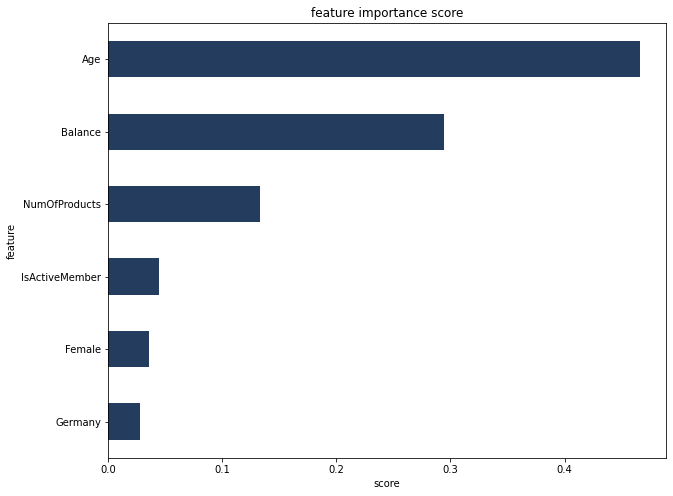

In [ ]:
show_feature_importance(dt)

### Hyperparameter Tuning with RandomSearch

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
import numpy as np

# List of hyperparameter
max_depth = [int(x) for x in np.linspace(1, 110, num = 30)] # Maximum number of levels in tree
min_samples_split = [2, 5, 10, 100] # Minimum number of samples required to split a node
min_samples_leaf = [1, 2, 4, 10, 20, 50] # Minimum number of samples required at each leaf node
max_features = ['auto', 'sqrt'] # Number of features to consider at every split

hyperparameters = dict(max_depth=max_depth, 
                       min_samples_split=min_samples_split, 
                       min_samples_leaf=min_samples_leaf,
                       max_features=max_features
                      )

# Inisialisasi Model
dt = DecisionTreeClassifier(random_state=42)
model = RandomizedSearchCV(dt, hyperparameters, cv=5, random_state=42, scoring='recall')
model.fit(X_train, y_train)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features=None,
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    presort='deprecated',
                                                    random_state=42,
            

In [ ]:
print('Best max_depth:', model.best_estimator_.get_params()['max_depth'])
print('Best min_samples_split:', model.best_estimator_.get_params()['min_samples_split'])
print('Best min_samples_leaf:', model.best_estimator_.get_params()['min_samples_leaf'])
print('Best max_features:', model.best_estimator_.get_params()['max_features'])

Best max_depth: 87
Best min_samples_split: 10
Best min_samples_leaf: 1
Best max_features: sqrt


<b> Evaluation </b>

In [ ]:
# Predict & Evaluation
y_pred = model.predict(X_test)#Check performa dari model
eval_classification(model, y_pred, X_train, y_train, X_test, y_test)

Accuracy (Test Set): 0.79
Precision (Test Set): 0.48
Recall (Test Set): 0.59
F1-Score (Test Set): 0.53
AUC: 0.72


In [ ]:
print('Train score: ' + str(model.score(X_train, y_train)))
print('Test score:' + str(model.score(X_test, y_test)))

Train score: 0.9011006289308177
Test score:0.5909090909090909


# KNeighborsClassifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=13)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=13, p=2,
                     weights='uniform')

In [ ]:
y_pred_knn = knn.predict(X_test)
eval_classification(knn, y_pred_knn, X_train, y_train, X_test, y_test)

Accuracy (Test Set): 0.77
Precision (Test Set): 0.45
Recall (Test Set): 0.70
F1-Score (Test Set): 0.55
AUC: 0.75


In [ ]:
print('Train score: ' + str(knn.score(X_train, y_train)))
print('Test score:' + str(knn.score(X_test, y_test))) 

Train score: 0.8323899371069182
Test score:0.7708854427213607


### Hyperparameter Tunning

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

# List of hyperparameter
n_neighbors = list(range(1,30))
p=[1,2]
algorithm = ['auto', 'ball_tree', 'kd_tree', 'brute']
hyperparameters = dict(n_neighbors=n_neighbors, p=p, algorithm=algorithm)

# Init model
knn = KNeighborsClassifier()
model = RandomizedSearchCV(knn, hyperparameters, cv=5, random_state=42, scoring='precision')

# Fit Model & Evaluasi
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
eval_classification(model, y_pred, X_train, y_train, X_test, y_test)

Accuracy (Test Set): 0.81
Precision (Test Set): 0.53
Recall (Test Set): 0.60
F1-Score (Test Set): 0.56
AUC: 0.73


In [ ]:
print('Train score: ' + str(model.score(X_train, y_train)))
print('Test score:' + str(model.score(X_test, y_test))) 

Train score: 0.9002579535683577
Test score:0.5267857142857143


# RANDOM FOREST <br>
Modeling and Evaluation

In [ ]:
#Model Random Forest
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [ ]:
y_pred_rf = rf.predict(X_test)
eval_classification(rf, y_pred_rf, X_train, y_train, X_test, y_test)

Accuracy (Test Set): 0.81
Precision (Test Set): 0.51
Recall (Test Set): 0.59
F1-Score (Test Set): 0.55
AUC: 0.73


Hasil modeling ternyata didapatkan nilai Accuracy : 0,92, Precision : 0,95, Recall : 0,87, F1-Score :0,91 dan AUC : 0,92. Untuk kasus Prediksi Churn yang perlu dilihat adalah nilai **Recall** yakni True Positif harus tinggi untuk mengurangi kesalahan prediksi nasabah Churn yang merugikan Bank.

In [ ]:
print('Train score: ' + str(rf.score(X_train, y_train)))
print('Test score:' + str(rf.score(X_test, y_test))) 

Train score: 0.9810534591194968
Test score:0.806903451725863


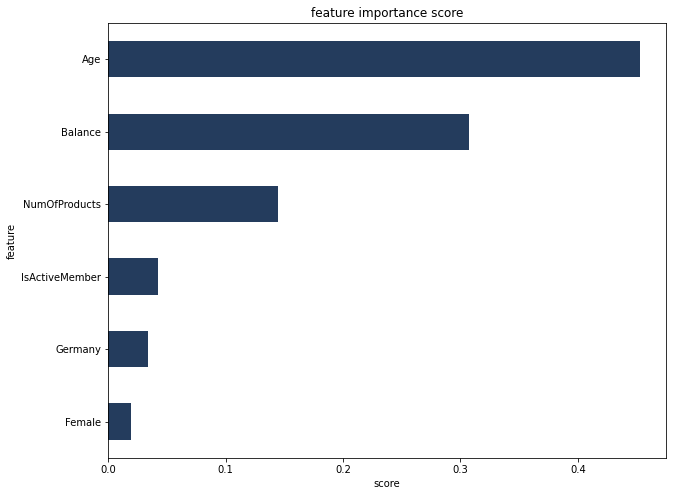

In [ ]:
#Feature Importance dari hasil model
show_feature_importance(rf)

### Hyperparamter Tunning

In [ ]:
# Hyperparameter Tunning
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
import numpy as np

# List of hyperparameter
max_depth = [int(x) for x in np.linspace(1, 110, num = 30)] # Maximum number of levels in tree
min_samples_split = [2, 5, 10, 100] # Minimum number of samples required to split a node
min_samples_leaf = [1, 2, 4, 10, 20, 50] # Minimum number of samples required at each leaf node
max_features = ['auto', 'sqrt'] # Number of features to consider at every split

hyperparameters = dict(max_depth=max_depth, 
                       min_samples_split=min_samples_split, 
                       min_samples_leaf=min_samples_leaf,
                       max_features=max_features
                      )

# Inisialisasi Model
dt = RandomForestClassifier(random_state=42)
model = RandomizedSearchCV(dt, hyperparameters, cv=5, random_state=42, scoring='recall')
model.fit(X_train, y_train)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [ ]:
print('Best max_depth:', model.best_estimator_.get_params()['max_depth'])
print('Best min_samples_split:', model.best_estimator_.get_params()['min_samples_split'])
print('Best min_samples_leaf:', model.best_estimator_.get_params()['min_samples_leaf'])
print('Best max_features:', model.best_estimator_.get_params()['max_features'])

Best max_depth: 87
Best min_samples_split: 10
Best min_samples_leaf: 1
Best max_features: sqrt


In [ ]:
# Predict & Evaluation
y_pred = model.predict(X_test)#Check performa dari model
eval_classification(model, y_pred, X_train, y_train, X_test, y_test)

Accuracy (Test Set): 0.82
Precision (Test Set): 0.54
Recall (Test Set): 0.62
F1-Score (Test Set): 0.58
AUC: 0.74


In [ ]:
print('Train score: ' + str(model.score(X_train, y_train))) #accuracy
print('Test score:' + str(model.score(X_test, y_test))) #accuracy

Train score: 0.9292452830188679
Test score:0.6186868686868687


#Ada Boost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
ab = AdaBoostClassifier(random_state=42)
ab.fit(X_train,y_train)

y_pred_ab = ab.predict(X_test)
eval_classification(ab, y_pred_ab, X_train, y_train, X_test, y_test)

Accuracy (Test Set): 0.78
Precision (Test Set): 0.46
Recall (Test Set): 0.72
F1-Score (Test Set): 0.56
AUC: 0.76


In [ ]:
print('Train score: ' + str(ab.score(X_train, y_train))) #accuracy
print('Test score:' + str(ab.score(X_test, y_test))) #accuracy

Train score: 0.7861635220125787
Test score:0.7753876938469234


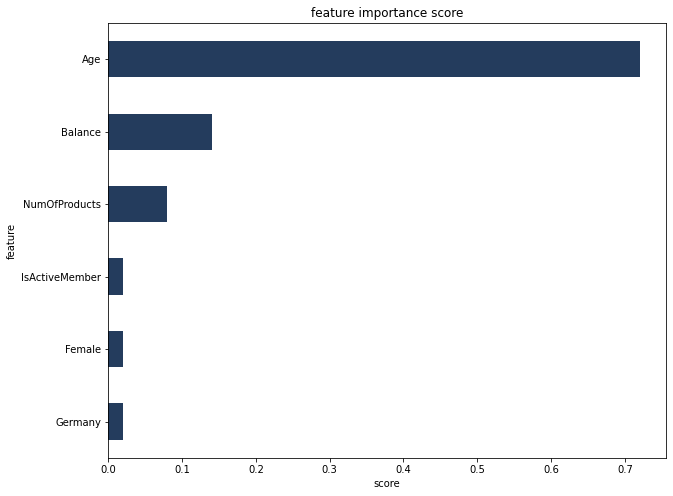

In [ ]:
show_feature_importance(ab)

### Hyperparameter Tunning

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import numpy as np

# List of hyperparameter
hyperparameters = dict(n_estimators = [int(x) for x in np.linspace(start = 100, stop = 2000, num = 100)], # Jumlah iterasi
                       learning_rate = [float(x) for x in np.linspace(start = 0.001, stop = 0.1, num = 100)],  
                       algorithm = ['SAMME', 'SAMME.R']
                      )

# Init model
ab = AdaBoostClassifier(random_state=42)
ab_tuned = RandomizedSearchCV(ab, hyperparameters, random_state=42, cv=5, scoring='recall')
ab_tuned.fit(X_train,y_train)

# Predict & Evaluation
y_pred = ab_tuned.predict(X_test)#Check performa dari model
eval_classification(ab_tuned, y_pred, X_train, y_train, X_test, y_test)

Accuracy (Test Set): 0.78
Precision (Test Set): 0.46
Recall (Test Set): 0.71
F1-Score (Test Set): 0.56
AUC: 0.75


In [ ]:
print('Train score: ' + str(ab_tuned.score(X_train, y_train))) #accuracy
print('Test score:' + str(ab_tuned.score(X_test, y_test))) #accuracy

Train score: 0.764937106918239
Test score:0.7070707070707071


#XG Boost

In [ ]:
from xgboost import XGBClassifier
xg = XGBClassifier(random_state=42)
xg.fit(X_train, y_train)

y_pred_xg = xg.predict(X_test)
eval_classification(xg, y_pred_xg, X_train, y_train, X_test, y_test)

Accuracy (Test Set): 0.81
Precision (Test Set): 0.51
Recall (Test Set): 0.72
F1-Score (Test Set): 0.60
AUC: 0.78


In [ ]:
print('Train score: ' + str(xg.score(X_train, y_train)))
print('Test score:' + str(xg.score(X_test, y_test)))

Train score: 0.8165880503144655
Test score:0.8054027013506754


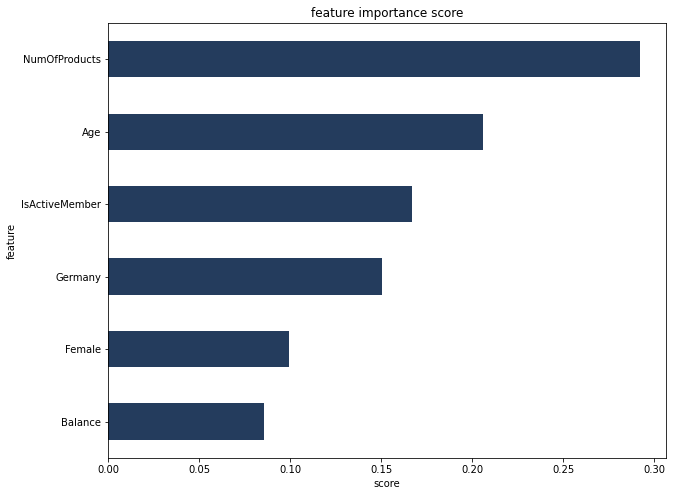

In [ ]:
show_feature_importance(xg)

## Hyperparameter Tunning

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import numpy as np

#Menjadikan ke dalam bentuk dictionary
hyperparameters = {
                    'max_depth' : [int(x) for x in np.linspace(10, 110, num = 11)],
                    'min_child_weight' : [int(x) for x in np.linspace(1, 20, num = 11)],
                    'gamma' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'tree_method' : ['auto', 'exact', 'approx', 'hist'],

                    'colsample_bytree' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'eta' : [float(x) for x in np.linspace(0, 1, num = 100)],

                    'lambda' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'alpha' : [float(x) for x in np.linspace(0, 1, num = 11)]
                    }

# Init
xg = XGBClassifier(random_state=42)
xg_tuned = RandomizedSearchCV(xg, hyperparameters, cv=10, random_state=42, scoring='recall')
xg_tuned.fit(X_train,y_train)

# Predict & Evaluation
y_pred = xg_tuned.predict(X_test)#Check performa dari model
eval_classification(xg_tuned, y_pred, X_train, y_train, X_test, y_test)

Accuracy (Test Set): 0.82
Precision (Test Set): 0.55
Recall (Test Set): 0.60
F1-Score (Test Set): 0.57
AUC: 0.74


In [ ]:
show_best_hyperparameter(xg_tuned.best_estimator_, hyperparameters)

Best max_depth: 110
Best min_child_weight: 2
Best gamma: 0.5
Best tree_method: hist
Best colsample_bytree: 1.0
Best eta: 0.7777777777777778
Best lambda: 0.2
Best alpha: 0.1


In [ ]:
print('Train score: ' + str(xg_tuned.score(X_train, y_train))) 
print('Test score:' + str(xg_tuned.score(X_test, y_test))) 

Train score: 0.9446540880503145
Test score:0.6035353535353535


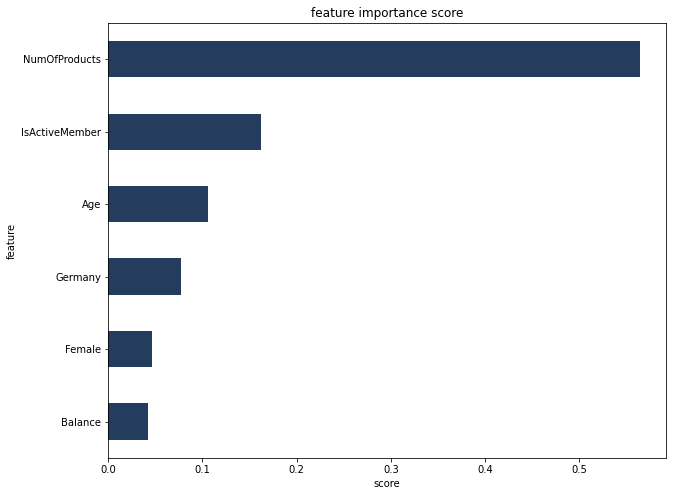

In [ ]:
show_feature_importance(xg_tuned.best_estimator_)

#Confussion Matrix

In [ ]:
from sklearn.metrics import  accuracy_score, f1_score, precision_score,confusion_matrix, recall_score, roc_auc_score

cm_xgb = confusion_matrix(y_test, y_pred=y_pred_xg)

TP = cm_xgb[1, 1]
TN = cm_xgb[0, 0]
FP = cm_xgb[0, 1]
FN = cm_xgb[1, 0]

In [ ]:
from matplotlib import rc,rcParams
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    plt.rcParams.update({'font.size': 12})
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title,fontdict={'size':'24'})
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes,fontsize=12,color="blue")
    plt.yticks(tick_marks, classes,fontsize=12,color="blue")
    rc('font', weight='bold')
    fmt = '.0f'
    thresh = cm.max()
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="orange")

    plt.ylabel('True label',fontdict={'size':'16'})
    plt.xlabel('Predicted label',fontdict={'size':'16'})
    plt.tight_layout()

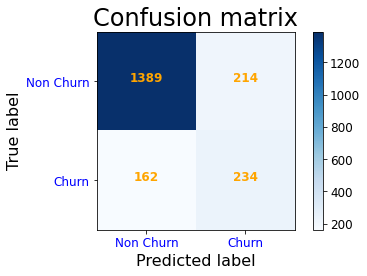

In [ ]:
import itertools
plot_confusion_matrix(confusion_matrix(y_test, y_pred=y_pred), classes=['Non Churn','Churn'],
                      title='Confusion matrix')

#Conclussion

Berdasarkan pemodelan yang dilakukan algoritma XGBoost menjadi pilihan terbaik dengan evaluasi recall tertinggi dan relatif tidak overfitting/underfitting. 

Beberapa feature penting yang menjadi fokus bisnis seperti berikut ini, NumOfproduct, IsActiveMember, Age, Germany, dan Female. Melalui Feature tersebut akan diberikan rekomendasi penawaran untuk mengantisipasi potensial Customer Churn.